# Sommaire :
 - <a href="#M1">Mission 1</a>
 - <a href="#M2">Mission 2</a>
 - <a href="#M3">Mission 3</a>
 - <a href="#M4">Mission 4</a>

In [1]:
import scipy
import pylab
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

from joblib import dump, load
from collections import Counter

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, decomposition
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 40)

sns.set()

# <a name="M1">Mission 1</a>

### World Income Distribution

In [2]:
idd = pd.read_csv('idd.csv', encoding='utf_8', encoding_errors='strict')

In [3]:
idd[:15]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297
5,ALB,2008,6,100,"1171,1412",7297
6,ALB,2008,7,100,"1201,1324",7297
7,ALB,2008,8,100,"1240,8976",7297
8,ALB,2008,9,100,"1285,6914",7297
9,ALB,2008,10,100,"1325,2533",7297


In [4]:
idd['country']=='ALB'

0         True
1         True
2         True
3         True
4         True
         ...  
11594    False
11595    False
11596    False
11597    False
11598    False
Name: country, Length: 11599, dtype: bool

In [5]:
idd.loc[idd['country']=='ALB', :]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297
...,...,...,...,...,...,...
95,ALB,2008,96,100,"6231,0996",7297
96,ALB,2008,97,100,"6822,3184",7297
97,ALB,2008,98,100,"7775,891",7297
98,ALB,2008,99,100,"9351,751",7297


In [6]:
idd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       11599 non-null  object
 1   year_survey   11599 non-null  int64 
 2   quantile      11599 non-null  int64 
 3   nb_quantiles  11599 non-null  int64 
 4   income        11599 non-null  object
 5   gdpppp        11399 non-null  object
dtypes: int64(3), object(3)
memory usage: 543.8+ KB


In [7]:
idd['income'] = idd['income'].str.replace(',', '.')
idd['gdpppp'] = idd['gdpppp'].str.replace(',', '.')
idd[:5]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297
1,ALB,2008,2,100,916.66235,7297
2,ALB,2008,3,100,1010.916,7297
3,ALB,2008,4,100,1086.9078,7297
4,ALB,2008,5,100,1132.6997,7297


In [8]:
idd['income'] = idd['income'].astype(float)
idd['gdpppp'] = idd['gdpppp'].astype(float)

#### Pays LTU, il manque une classe de revenus, le quantile n° 41 : imputation par la moyenne

In [9]:
idd.loc[idd['country']=='LTU', :].loc[6238:6242, :]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6238,LTU,2008,39,100,4802.3680,17571.0
6239,LTU,2008,40,100,4868.4507,17571.0
6240,LTU,2008,42,100,4895.8306,17571.0
6241,LTU,2008,43,100,4950.6380,17571.0
6242,LTU,2008,44,100,5006.7860,17571.0


In [10]:
q41 = ['LTU', 2008, 41, 100, np.mean([4895.8306, 4868.4507]), 17571.0]
q41

['LTU', 2008, 41, 100, 4882.14065, 17571.0]

In [11]:
idd[-1:]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
11598,COD,2008,100,100,2243.1226,303.19305


In [12]:
idd.loc[idd.index[-1]+1] = q41
idd[-1:]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
11599,LTU,2008,41,100,4882.14065,17571.0


In [13]:
idd = idd.sort_values(by=['country', 'quantile'])

In [14]:
idd = idd.reset_index(drop=True)

In [15]:
idd.loc[idd['country']=='LTU', :].loc[6238:6242, :]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6238,LTU,2008,39,100,4802.36800,17571.0
6239,LTU,2008,40,100,4868.45070,17571.0
6240,LTU,2008,41,100,4882.14065,17571.0
6241,LTU,2008,42,100,4895.83060,17571.0
6242,LTU,2008,43,100,4950.63800,17571.0


In [16]:
idd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11400 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.9+ KB


In [17]:
# Valeurs manquantes
idd.isna().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

In [18]:
idd.count()

country         11600
year_survey     11600
quantile        11600
nb_quantiles    11600
income          11600
gdpppp          11400
dtype: int64

In [19]:
# Duplicate (most commonly rows of data that are exactly the same across all columns)
idd.duplicated().any()

False

In [20]:
idd.describe(include='all')

,country,year_survey,quantile,nb_quantiles,income,gdpppp
count,11600,11600.000000,11600.000000,11600.0,11600.000000,1.140000e+04
unique,116,NaN,NaN,NaN,NaN,NaN
top,ALB,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.982759,50.500000,100.0,6069.121925,5.021841e+04
std,NaN,0.909593,28.867314,0.0,9413.786596,4.000513e+05
min,NaN,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,NaN,2008.000000,25.750000,100.0,900.768507,2.576000e+03
50%,NaN,2008.000000,50.500000,100.0,2403.492950,7.709000e+03
75%,NaN,2008.000000,75.250000,100.0,7515.313700,1.877300e+04


In [21]:
print('Années des sondages :')
print(*np.sort(idd['year_survey'].unique()), sep=', ')

Années des sondages :
2004, 2006, 2007, 2008, 2009, 2010, 2011


In [22]:
print('Nombre de pays :')
print(idd['country'].nunique())

Nombre de pays :
116


### Population

In [23]:
pop = pd.read_csv('pop.csv', encoding='utf_8', encoding_errors='strict')

In [24]:
pop[:5]

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,AFG,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,27722.276,X,International reliable sources,NaN
1,OA,Annual population,ALB,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,3002.678,X,International reliable sources,NaN
2,OA,Annual population,DZA,Algeria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,34730.608,X,International reliable sources,NaN
3,OA,Annual population,ASM,American Samoa,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,57.492,X,International reliable sources,NaN
4,OA,Annual population,AND,Andorra,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,83.862,X,International reliable sources,NaN


In [25]:
pop = pop.loc[:, ['Area Code (ISO3)', 'Value']]
pop[:5]

,Area Code (ISO3),Value
0,AFG,27722.276
1,ALB,3002.678
2,DZA,34730.608
3,ASM,57.492
4,AND,83.862


In [26]:
pop['Population'] = pop['Value'] * 1000
pop[:5]

,Area Code (ISO3),Value,Population
0,AFG,27722.276,27722276.0
1,ALB,3002.678,3002678.0
2,DZA,34730.608,34730608.0
3,ASM,57.492,57492.0
4,AND,83.862,83862.0


In [27]:
pop = pop.drop(columns='Value')
pop[:5]

,Area Code (ISO3),Population
0,AFG,27722276.0
1,ALB,3002678.0
2,DZA,34730608.0
3,ASM,57492.0
4,AND,83862.0


In [28]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area Code (ISO3)  248 non-null    object 
 1   Population        231 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [29]:
# Valeurs manquantes
pop.isna().sum()

Area Code (ISO3)     0
Population          17
dtype: int64

In [30]:
pop.count()

Area Code (ISO3)    248
Population          231
dtype: int64

In [31]:
# Duplicate (most commonly rows of data that are exactly the same across all columns)
pop.duplicated().any()

False

In [32]:
pop.describe(include='all')

,Area Code (ISO3),Population
count,248,2.310000e+02
unique,248,NaN
top,AFG,NaN
freq,1,NaN
mean,NaN,3.538127e+07
std,NaN,1.520244e+08
min,NaN,7.940000e+02
25%,NaN,4.067280e+05
50%,NaN,4.775804e+06
75%,NaN,1.979478e+07


### Indice de Gini

In [33]:
gini = pd.read_csv('gini.csv', encoding='utf_8', encoding_errors='strict')

In [34]:
gini[:5]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN,NaN


In [35]:
gini = gini.iloc[:, :-1]
gini

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,31.2,30.3,NaN,NaN,31.8,33.3,27.8,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.3,NaN,NaN,NaN,NaN,NaN,NaN,57.8,NaN,NaN,NaN,NaN,64.8,NaN,NaN,63.0,NaN,63.4,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.5,NaN,52.6,NaN,NaN,48.3,NaN,49.1,NaN,NaN,NaN,42.1,NaN,54.3,NaN,54.6,NaN,NaN,NaN,55.6,NaN,NaN,NaN,NaN,57.1,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
gini = gini.drop(columns=['Indicator Name', 'Indicator Code'])
gini[:5]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN


In [37]:
gini.set_index(['Country Name', 'Country Code'], inplace=True)
gini[:5]

,,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN


In [38]:
gini = gini.loc[:, '2000':'2020']

In [39]:
gini = gini.dropna(axis='index', how='all')
gini

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,
Angola,AGO,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN
Albania,ALB,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,34.6,32.8,33.7,33.1,30.1,30.8,NaN
United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.5,NaN,NaN,NaN,NaN,26.0,NaN,NaN
Argentina,ARG,51.1,53.3,53.8,50.9,48.4,47.7,46.3,46.2,44.9,43.7,43.6,42.6,41.3,40.9,41.6,NaN,42.0,41.1,41.3,42.9,42.3
Armenia,ARM,NaN,35.4,34.8,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,33.6,34.4,29.9,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,NaN,NaN,NaN,29.0,NaN,31.2,30.3,NaN,NaN,31.8,33.3,27.8,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN,NaN
"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,ZAF,57.8,NaN,NaN,NaN,NaN,64.8,NaN,NaN,63.0,NaN,63.4,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
gini['Gini index'] = gini.mean(axis=1)
gini['Gini index'] = gini['Gini index'].round().astype(int)
gini

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Gini index
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,,
Angola,AGO,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,49
Albania,ALB,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,34.6,32.8,33.7,33.1,30.1,30.8,NaN,32
United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.5,NaN,NaN,NaN,NaN,26.0,NaN,NaN,29
Argentina,ARG,51.1,53.3,53.8,50.9,48.4,47.7,46.3,46.2,44.9,43.7,43.6,42.6,41.3,40.9,41.6,NaN,42.0,41.1,41.3,42.9,42.3,45
Armenia,ARM,NaN,35.4,34.8,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,33.6,34.4,29.9,25.2,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,NaN,NaN,NaN,29.0,NaN,31.2,30.3,NaN,NaN,31.8,33.3,27.8,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN,NaN,29
"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN,36
South Africa,ZAF,57.8,NaN,NaN,NaN,NaN,64.8,NaN,NaN,63.0,NaN,63.4,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,62


In [41]:
gini = gini[['Gini index']]
gini.reset_index(inplace=True)
gini

,Country Name,Country Code,Gini index
0,Angola,AGO,49
1,Albania,ALB,32
2,United Arab Emirates,ARE,29
3,Argentina,ARG,45
4,Armenia,ARM,32
...,...,...,...
158,Kosovo,XKX,29
159,"Yemen, Rep.",YEM,36
160,South Africa,ZAF,62
161,Zambia,ZMB,53


In [42]:
gini_sorted = gini.sort_values(by='Gini index', ascending=True).reset_index(drop=True)
gini_sorted

,Country Name,Country Code,Gini index
0,Slovenia,SVN,25
1,Czech Republic,CZE,26
2,Ukraine,UKR,26
3,Slovak Republic,SVK,26
4,Norway,NOR,27
...,...,...,...
158,Brazil,BRA,54
159,Central African Republic,CAF,56
160,Botswana,BWA,60
161,Namibia,NAM,61


In [43]:
print('Index de Gini moyen :', int(np.round(gini['Gini index'].mean())))

Index de Gini moyen : 39


In [44]:
print('5 meilleurs indices : \n')
gini_sorted[:5]

5 meilleurs indices : 



,Country Name,Country Code,Gini index
0,Slovenia,SVN,25
1,Czech Republic,CZE,26
2,Ukraine,UKR,26
3,Slovak Republic,SVK,26
4,Norway,NOR,27


In [45]:
print('5 moins bons indices : \n')
gini_sorted[-5:]

5 moins bons indices : 



,Country Name,Country Code,Gini index
158,Brazil,BRA,54
159,Central African Republic,CAF,56
160,Botswana,BWA,60
161,Namibia,NAM,61
162,South Africa,ZAF,62


In [46]:
print('Position de la France par rapport aux meilleurs : \n')
gini_sorted.loc[(gini_sorted['Country Name']=='France'), :]

Position de la France par rapport aux meilleurs : 



,Country Name,Country Code,Gini index
33,France,FRA,32


In [47]:
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  163 non-null    object
 1   Country Code  163 non-null    object
 2   Gini index    163 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


In [48]:
# Valeurs manquantes
gini.isna().sum()

Country Name    0
Country Code    0
Gini index      0
dtype: int64

In [49]:
gini.count()

Country Name    163
Country Code    163
Gini index      163
dtype: int64

In [50]:
# Duplicate (most commonly rows of data that are exactly the same across all columns)
gini.duplicated().any()

False

In [51]:
gini.describe(include='all')

,Country Name,Country Code,Gini index
count,163,163,163.000000
unique,163,163,NaN
top,Angola,AGO,NaN
freq,1,1,NaN
mean,NaN,NaN,38.570552
std,NaN,NaN,7.714000
min,NaN,NaN,25.000000
25%,NaN,NaN,33.000000
50%,NaN,NaN,37.000000
75%,NaN,NaN,43.000000


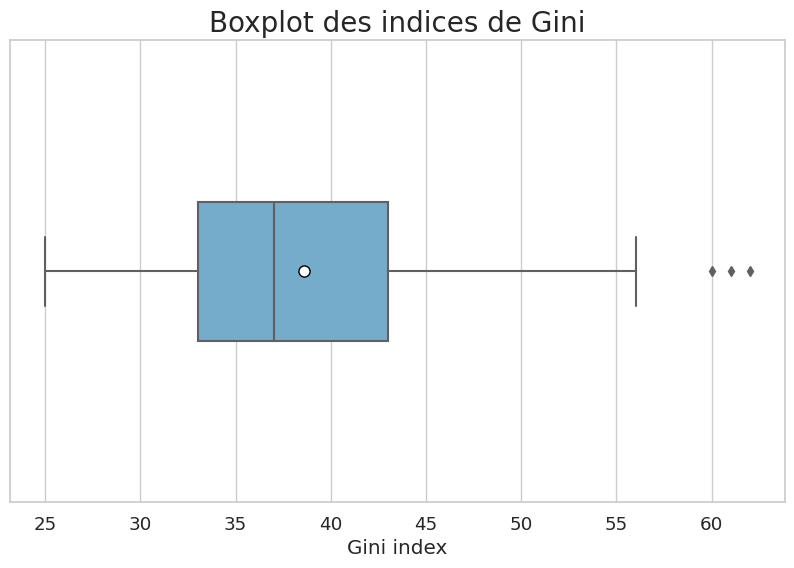

In [52]:
sns.set(font_scale=1.2, style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

_ = ax.set_title('Boxplot des indices de Gini', fontsize=20)

g = sns.boxplot(ax=ax, orient='h', data=gini, x='Gini index', palette='Blues', width=0.3,
                showmeans=True, showfliers=True, saturation=0.8, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})

plt.show();

# <a name="M2">Mission 2</a>

In [53]:
idd[:5]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [54]:
grp = idd.groupby('country')[['income']].max().sort_values(ascending=False, by='income')
grp

,income
country,
USA,176928.5500
ISL,160645.2700
GBR,141565.2300
CAN,133454.8400
FRA,122775.1640
...,...
MDG,3164.7986
MLI,2958.8750
CIV,2814.3389


In [55]:
nb_pays = 6
a = pd.DataFrame(pd.qcut(grp['income'], q=nb_pays, labels=range(1, nb_pays+1)))
a.reset_index(inplace=True)
b = a.groupby('income')[['country']].nth(0).sort_values(by='income', ascending=False)
a

,country,income
0,USA,6
1,ISL,6
2,GBR,6
3,CAN,6
4,FRA,6
...,...,...
111,MDG,1
112,MLI,1
113,CIV,1
114,COD,1


In [56]:
country_list = list(b['country'])
country_list

['USA', 'AUT', 'TUR', 'NIC', 'IDN', 'ARM']

In [57]:
country_list = ['FRA', 'ESP', 'CZE', 'SRB', 'KAZ', 'TZA']

In [58]:
# qcut_series, qcut_intervals = pd.qcut(grp['income'], q=5, labels=range(1, 6), retbins=True)
# print(qcut_series.value_counts())
# print('\nintervals', *qcut_intervals, sep=', ')

In [59]:
idd[:5]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [60]:
clist = idd.loc[(idd['country'].isin(country_list)), :]
clist

,country,year_survey,quantile,nb_quantiles,income,gdpppp
2400,CZE,2008,1,100,1586.2471,23223.0
2401,CZE,2008,2,100,2322.1792,23223.0
2402,CZE,2008,3,100,2741.5847,23223.0
2403,CZE,2008,4,100,3067.3618,23223.0
2404,CZE,2008,5,100,3395.3267,23223.0
...,...,...,...,...,...,...
10695,TZA,2007,96,100,1470.8505,1201.0
10696,TZA,2007,97,100,1634.9623,1201.0
10697,TZA,2007,98,100,1882.9491,1201.0
10698,TZA,2007,99,100,2318.6868,1201.0


In [61]:
# sns.set(font_scale=1.2, style='whitegrid')

# fig, axes = plt.subplots(6, 1, figsize=(10, 12))
# fig.suptitle('Boxplots des 6 pays sélectionnés', fontsize=20)

# # xx = [0,0,0,1,1,1]
# # yy = [0,1,2,0,1,2]

# xx = [0,1,2,3,4,5]
# yy = [0,0,0,0,0,0]

# for a, b in enumerate(country_list):
    
#     ax = axes[xx[a]]
    
#     g = sns.boxplot(ax=ax, orient='h', data=clist.loc[(clist['country']==b), :], x='income', palette='Blues',
#                     showmeans=True, showfliers=False, saturation=0.8, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
    
#     g.set(xlabel=b)
#     g.set_xscale('log')
#     g.set_xlim(80, 50000)

# #plt.savefig('Boxplots des 6 variables explicatives.png', transparent=True)
# fig.tight_layout()
# plt.show();

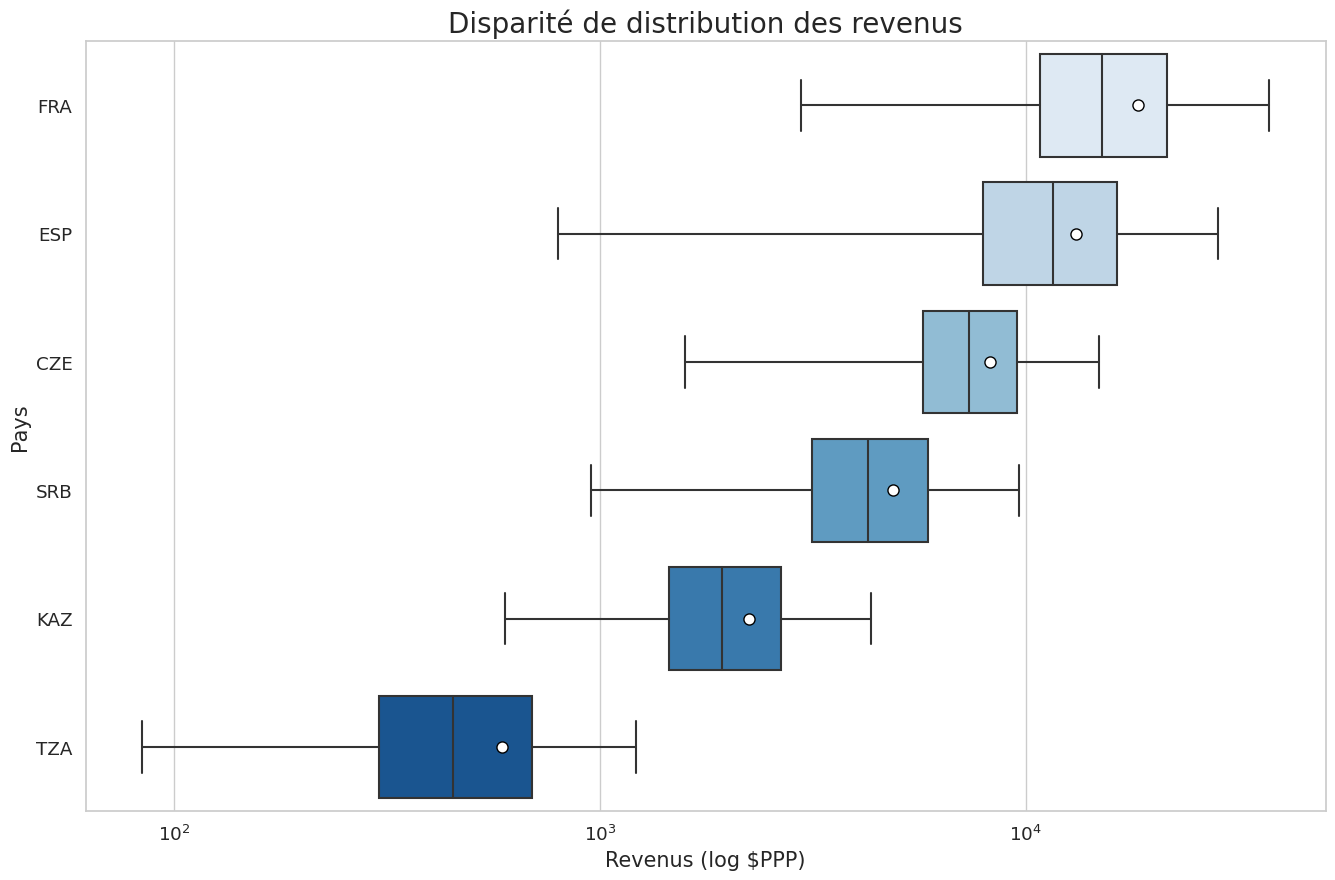

In [62]:
sns.set(font_scale=1.2, style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 10))

_ = ax.set_title ('Disparité de distribution des revenus', fontsize=20)

g = sns.boxplot(ax=ax, orient='h', data=clist, x='income', y='country', palette='Blues', order = country_list,
                showmeans=True, showfliers=False, saturation=0.8, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})

g.set_xscale('log')

# nom des axes
plt.xlabel(f'Revenus (log $PPP)', fontsize='15')
plt.ylabel(f'Pays', fontsize='15')

plt.savefig('Distribution des revenus (6 pays).png', transparent=True)
plt.show();

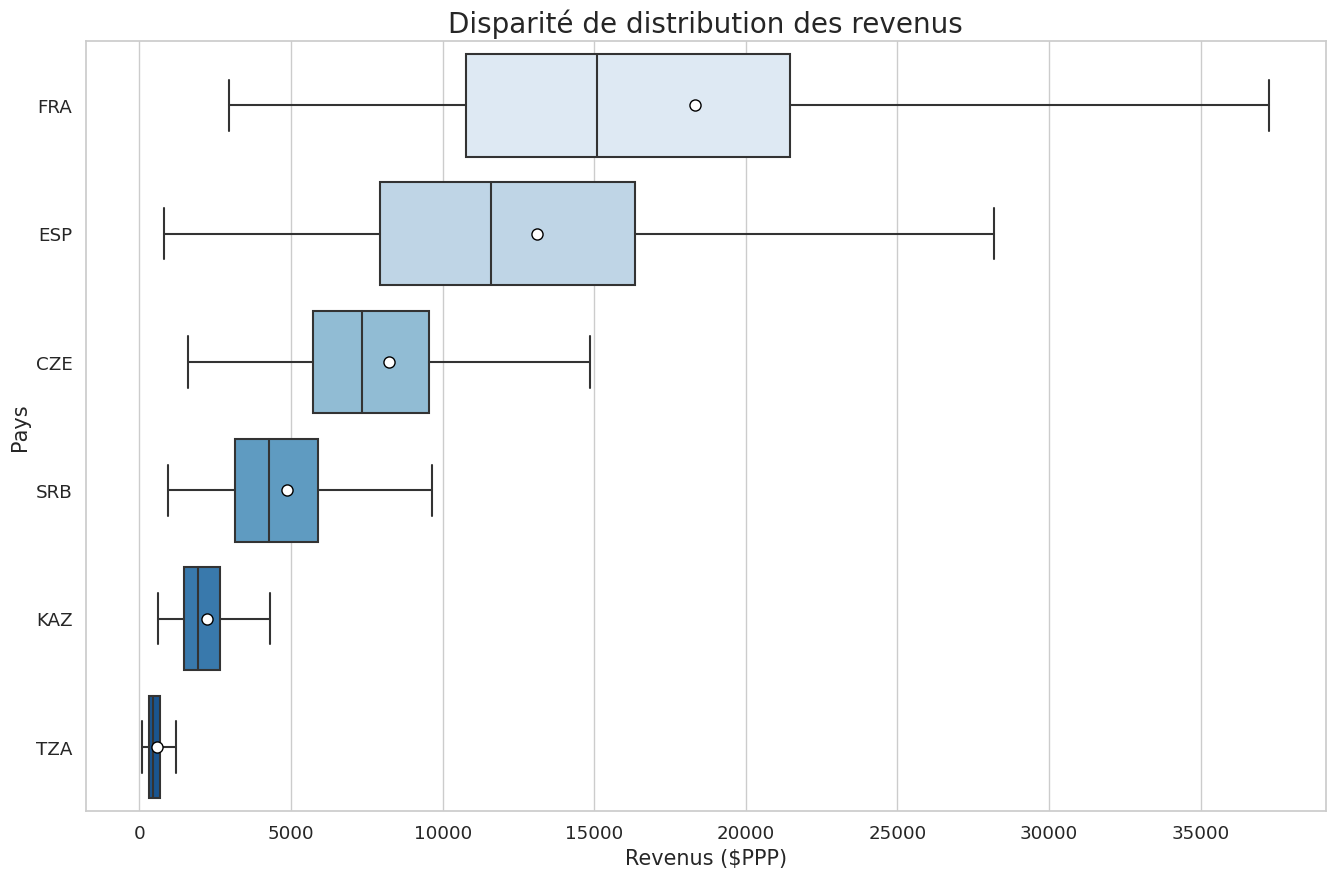

In [63]:
sns.set(font_scale=1.2, style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 10))

_ = ax.set_title ('Disparité de distribution des revenus', fontsize=20)

g = sns.boxplot(ax=ax, orient='h', data=clist, x='income', y='country', palette='Blues', order = country_list,
                showmeans=True, showfliers=False, saturation=0.8, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})

#g.set_xscale('log')

# nom des axes
plt.xlabel(f'Revenus ($PPP)', fontsize='15')
plt.ylabel(f'Pays', fontsize='15')

plt.savefig('Distribution des revenus (6 pays).png', transparent=True)
plt.show();

#### Si skewness > 0 alors la distribution est étalée à droite, la moyenne est supérieure à la médiane.

--------------------
CZE
moyenne:
 8235.293410999999
médiane:
 7335.3867
variance:
 20086519.495640744
écart type:
 4481.798689771858
kurtosis:
 16.65995504306778
skewness:
 3.1347014037102454


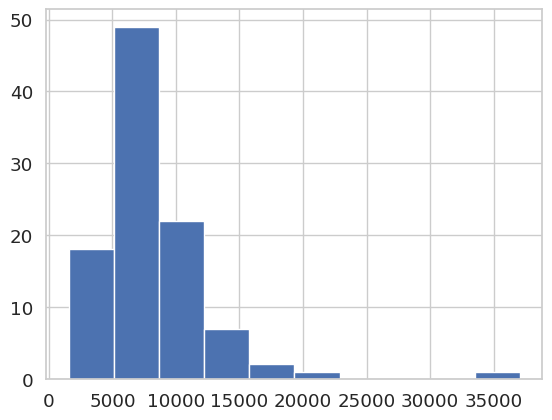

--------------------
ESP
moyenne:
 13116.9929096
médiane:
 11579.4535
variance:
 61490544.11378437
écart type:
 7841.59066221799
kurtosis:
 5.3792364410110345
skewness:
 1.7786662131943882


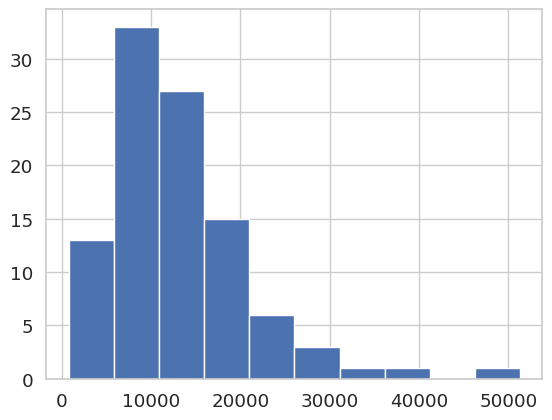

--------------------
FRA
moyenne:
 18309.407545
médiane:
 15092.115
variance:
 205982078.9290721
écart type:
 14352.075770740346
kurtosis:
 27.828293350013
skewness:
 4.339983017533462


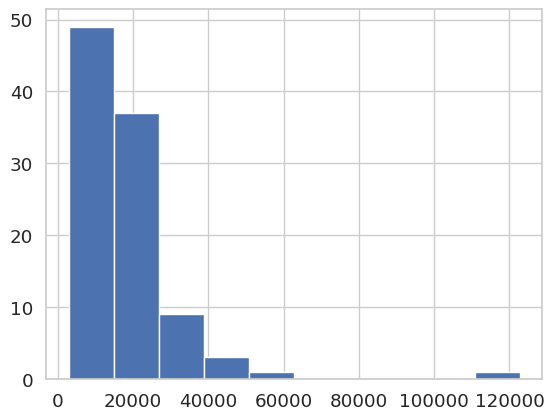

--------------------
KAZ
moyenne:
 2239.1497999999997
médiane:
 1936.5536
variance:
 1495897.926762711
écart type:
 1223.0690605042346
kurtosis:
 9.008337566436037
skewness:
 2.3668854398508805


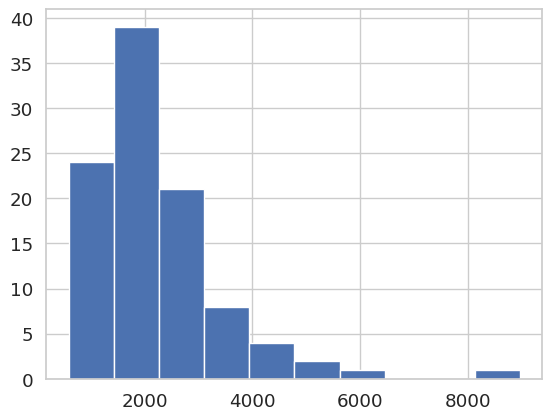

--------------------
SRB
moyenne:
 4879.7508516
médiane:
 4261.65185
variance:
 6912469.288951856
écart type:
 2629.1575245602644
kurtosis:
 5.290235224336538
skewness:
 1.8331568590621374


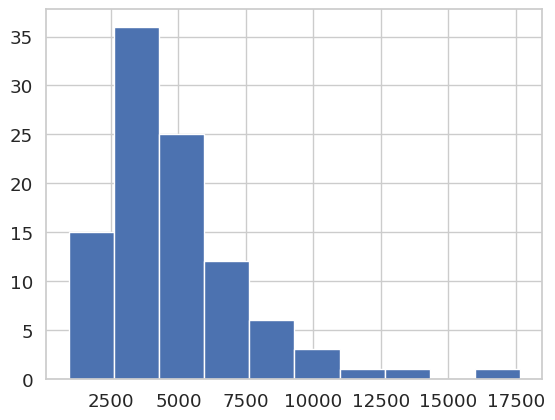

--------------------
TZA
moyenne:
 588.7669863
médiane:
 451.22856
variance:
 258968.67469635248
écart type:
 508.88964883985653
kurtosis:
 19.150370119332024
skewness:
 3.621058427648609


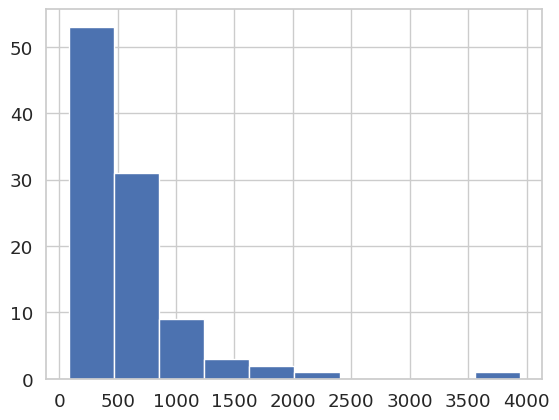

In [64]:
for cat in clist['country'].unique():
    subset = clist.loc[clist['country'] == cat, :]
    print("-"*20)
    print(cat)
    print("moyenne:\n",subset['income'].mean())
    print("médiane:\n",subset['income'].median())
    print("variance:\n",subset['income'].var(ddof=0))
    print("écart type:\n",subset['income'].std(ddof=0))
    print("kurtosis:\n",subset['income'].kurtosis())
    print("skewness:\n",subset['income'].skew())
    subset['income'].hist()
    plt.show()

In [65]:
# sns.set(style='whitegrid')

# #Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(12, 10))

# g = sns.barplot(data=usa, x='quantile', y='income', palette='rocket_r', saturation=0.1)
# g.set_yscale('log')

# plt.xticks(range(-1, 100, 10))
# plt.ylabel('Revenu moyen')
# plt.xlabel('Classes de revenus')
# plt.title ('Distribution des revenus (USA)', fontsize=20)
# plt.show()

In [66]:
# sns.set(style='whitegrid')

# for i in country_list:

#     sns.catplot(data=idd.loc[(idd['country']==i), :], x='quantile', y='income', height=5, aspect=2, kind='bar', palette='viridis')
#     plt.xticks(range(-1, 100, 10))
#     plt.ylabel('Revenu moyen')
#     plt.xlabel('Classes de revenus')
#     plt.title(f'Distribution des revenus ({i})')

# plt.show()

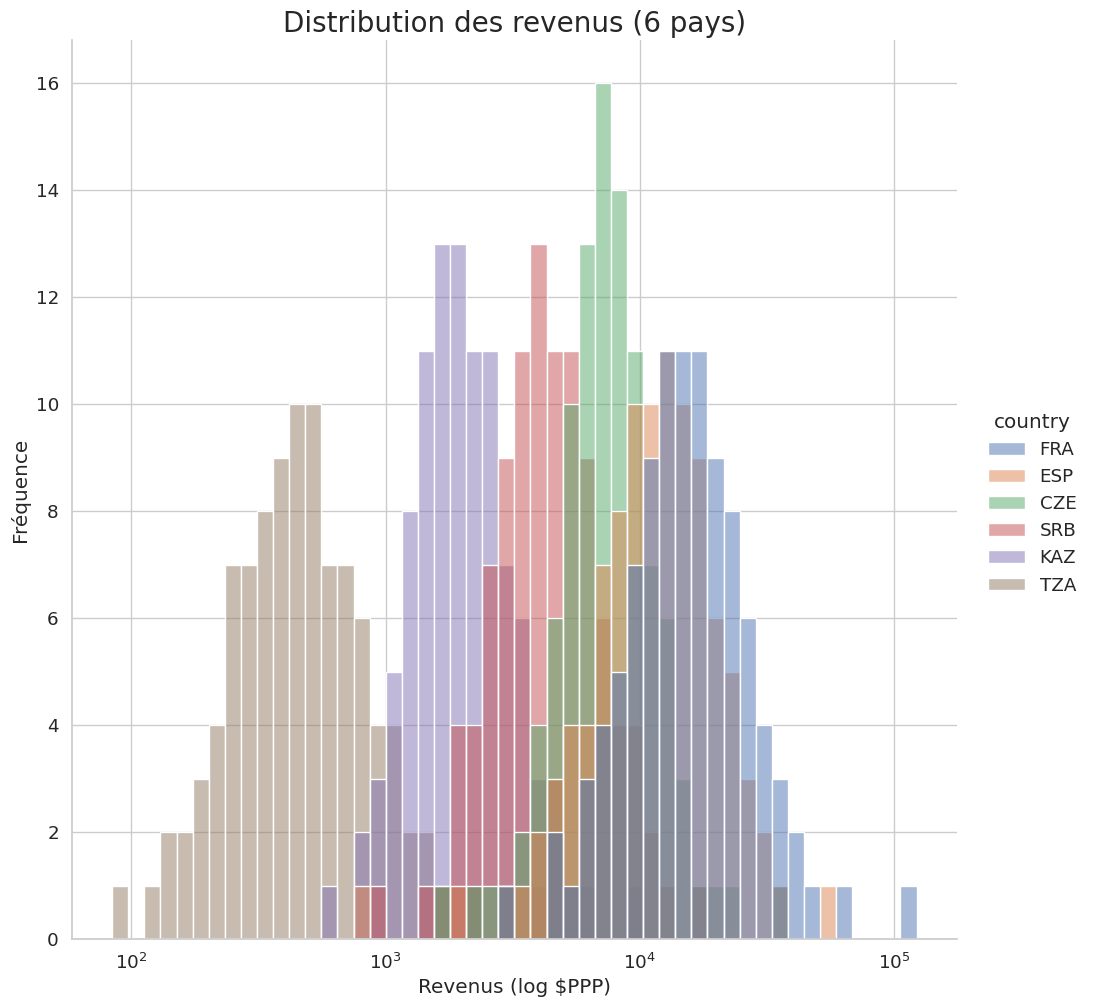

In [67]:
sns.displot(clist, x='income', hue='country', hue_order=country_list, log_scale=True, bins=50, height=10, aspect=1)
plt.ylabel('Fréquence')
plt.xlabel('Revenus (log $PPP)')
plt.title('Distribution des revenus (6 pays)', fontsize=20)
plt.show();

In [68]:
clist_mean = clist.groupby('country')[['income']].mean().sort_values(by='income', ascending=False)
clist_mean

,income
country,
FRA,18309.407545
ESP,13116.992910
CZE,8235.293411
SRB,4879.750852
KAZ,2239.149800
TZA,588.766986


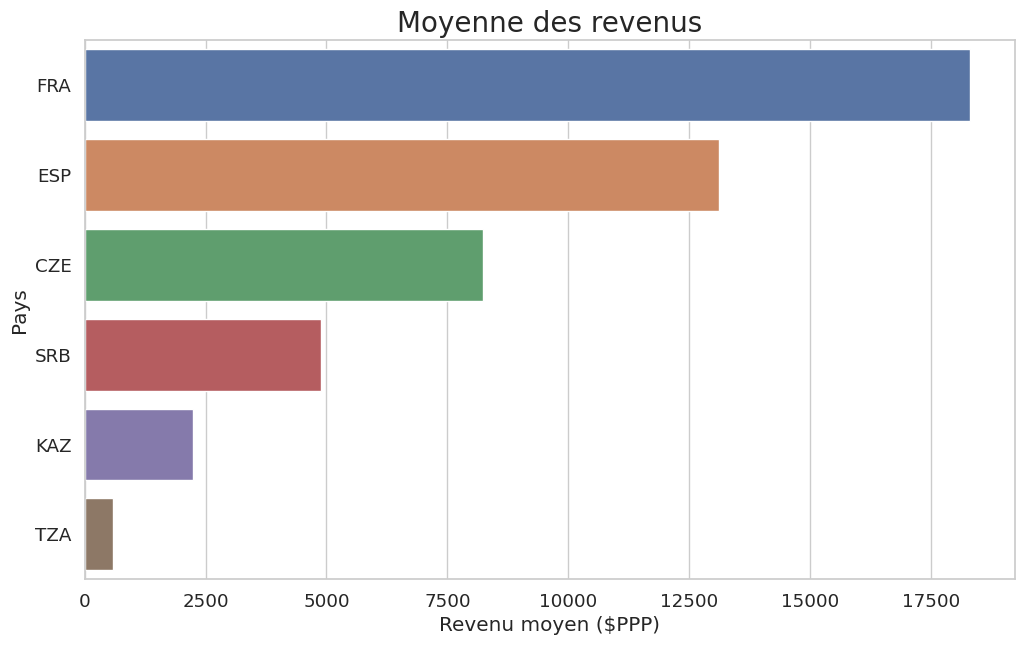

In [69]:
plt.figure(figsize=(12, 7))
sns.barplot(data=clist_mean, x='income', y=clist_mean.index)
plt.ylabel('Pays')
plt.xlabel('Revenu moyen ($PPP)')
plt.title('Moyenne des revenus', fontsize=20)
plt.savefig('Moyenne des revenus (6 pays).png', transparent=True)
plt.show();

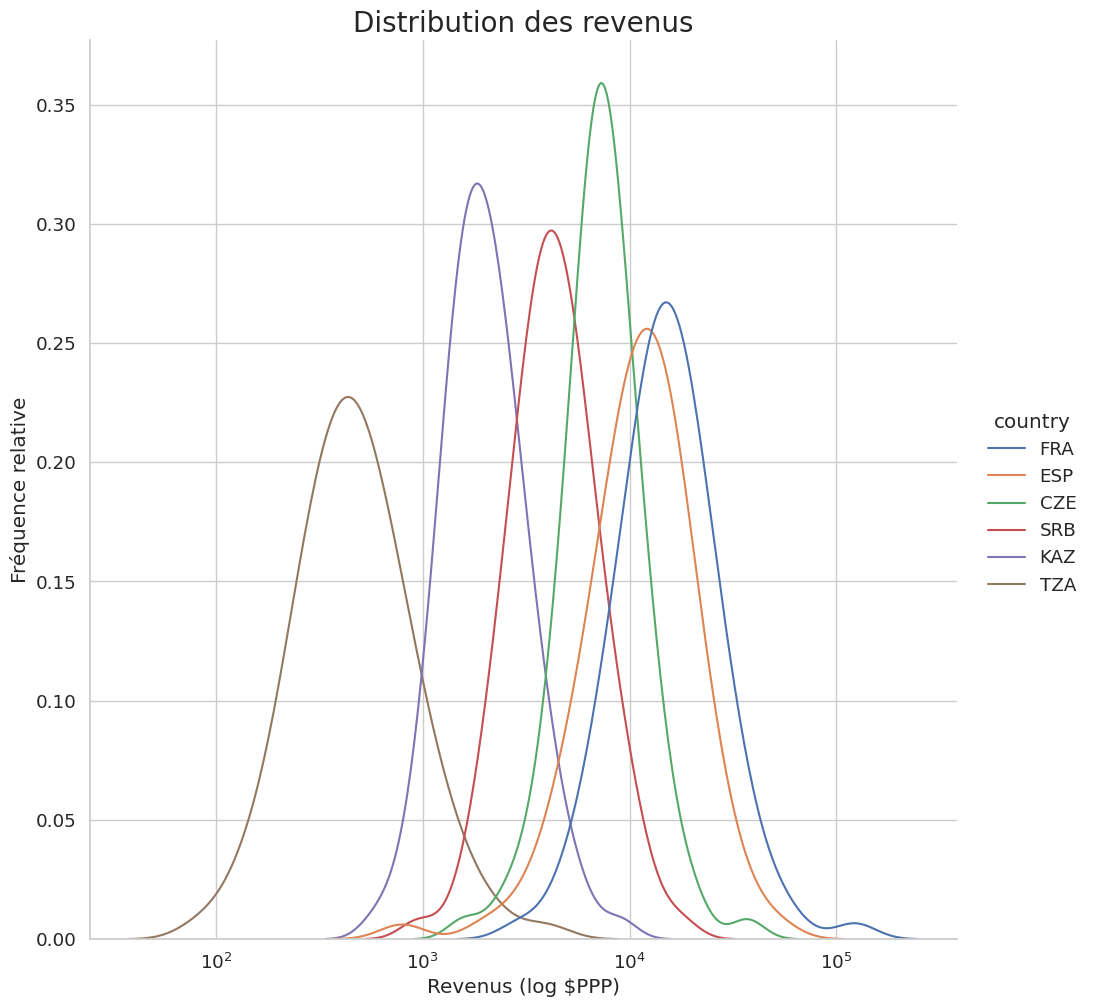

In [70]:
sns.displot(data=clist, x='income', hue='country', hue_order=country_list, log_scale=True, height=10, aspect=1, kind='kde')
plt.ylabel('Fréquence relative')
plt.xlabel('Revenus (log $PPP)')
plt.title('Distribution des revenus', fontsize=20)
plt.show();

In [71]:
# f, ax = plt.subplots(figsize=(8, 4))
# f.suptitle('Revenu moyen par habitant des USA', fontsize=20)
# g = sns.boxplot(data=idd.loc[(idd['country']=='USA'), :], x='income', orient='h',  width=.4, saturation=0.8, color='tab:blue', showfliers=False);

In [72]:
#data = idd.loc[(idd['country'].isin(country_list)), :].sort_values(by='gdpppp', ascending=False)
data = idd.loc[(idd['country'].isin(country_list)), :]
data[:10]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
2400,CZE,2008,1,100,1586.2471,23223.0
2401,CZE,2008,2,100,2322.1792,23223.0
2402,CZE,2008,3,100,2741.5847,23223.0
2403,CZE,2008,4,100,3067.3618,23223.0
2404,CZE,2008,5,100,3395.3267,23223.0
2405,CZE,2008,6,100,3607.9130,23223.0
2406,CZE,2008,7,100,3802.4858,23223.0
2407,CZE,2008,8,100,3974.2010,23223.0
2408,CZE,2008,9,100,4111.6743,23223.0
2409,CZE,2008,10,100,4231.9260,23223.0


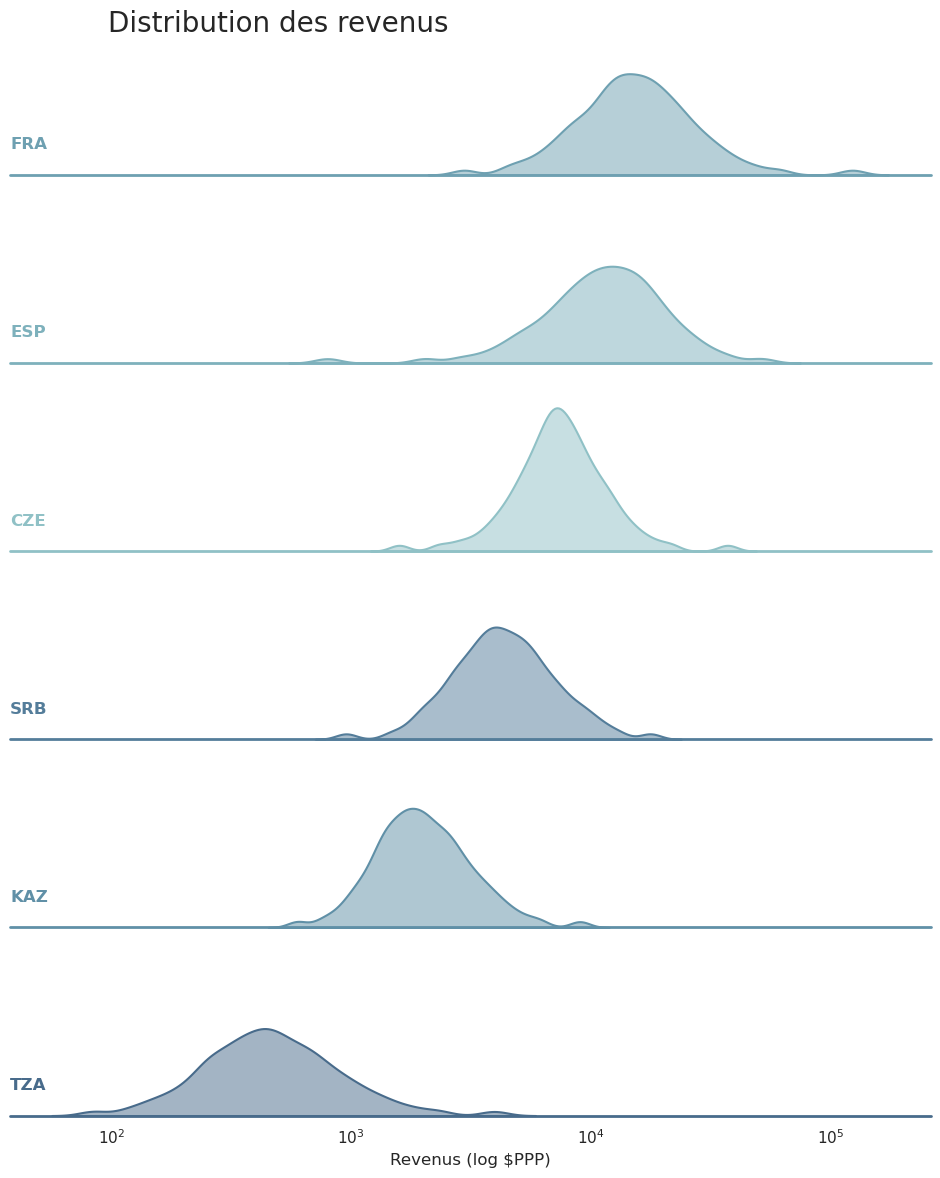

In [73]:
sns.set_theme(style='white', rc={'axes.facecolor': (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data, row='country', hue='country', aspect=5, height=2, palette=pal, row_order=country_list)

# Draw the densities
g.map(sns.kdeplot, 'income', bw_adjust=.5, clip_on=False, log_scale=True, fill=True, alpha=.5, linewidth=1.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle='-', color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color, ha='left', va='center', transform=ax.transAxes)
    
g.map(label, 'income')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=.25)

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[], ylabel='')
g.despine(bottom=True, left=True)
plt.xlabel('Revenus (log $PPP)', fontsize=12)
plt.suptitle('Distribution des revenus', fontsize=20, ha='right');

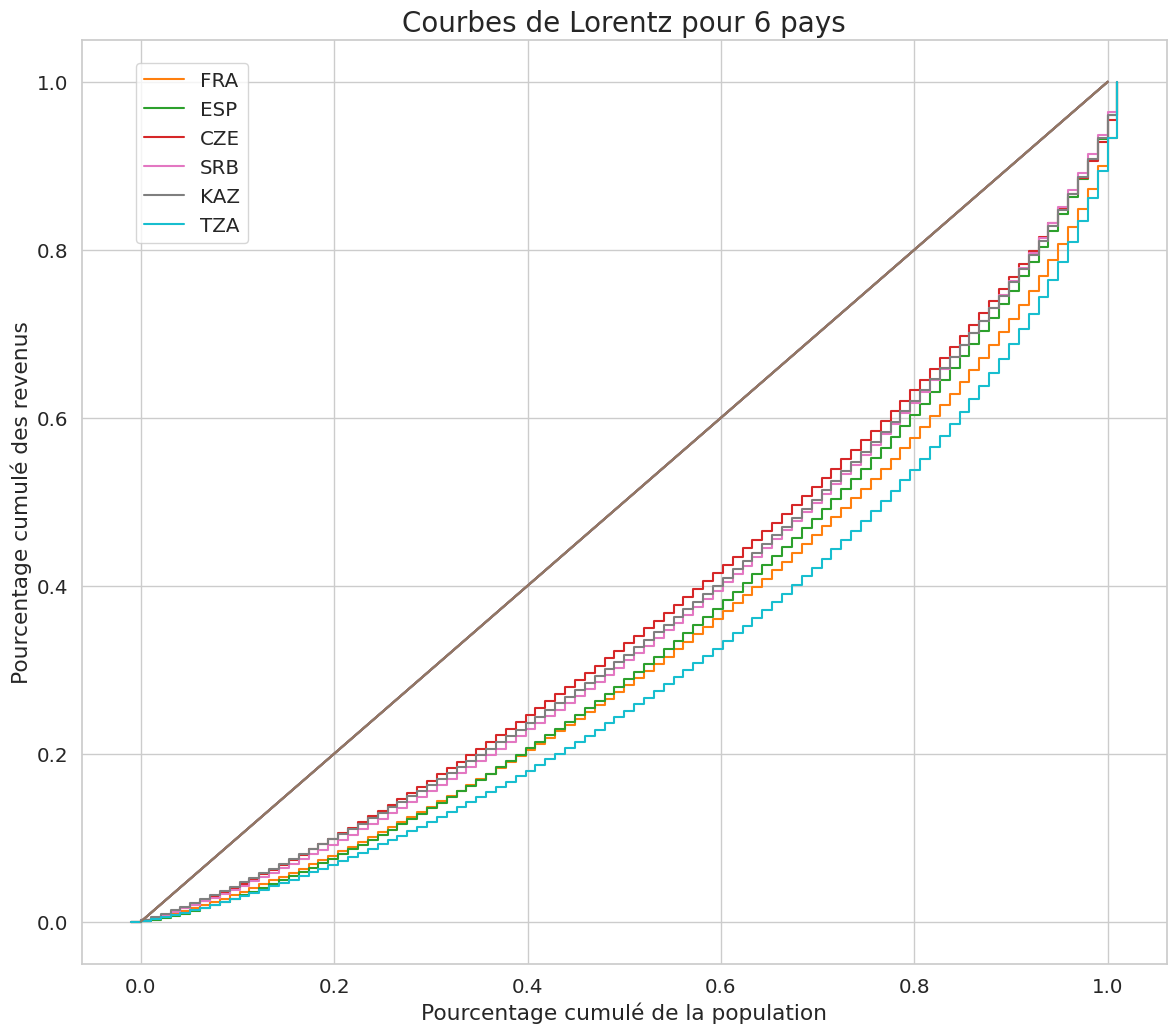

In [74]:
sns.set(font_scale=1.3, style='whitegrid')
fig, ax = plt.subplots(figsize=(14, 12))
_ = ax.set_title ('Courbes de Lorentz pour 6 pays', fontsize=20)
colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:pink', 'tab:grey', 'tab:cyan']

for count, country in enumerate(country_list):

    dep = clist.loc[(clist['country']==country), 'income'].to_numpy()
    n = len(dep)
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()
    lorenz = np.append([0], lorenz) 
    xaxis = np.linspace(0-1/n, 1+1/n, len(lorenz)) 

    ax.plot(xaxis, lorenz, drawstyle='steps-post', label=f'{country}', color=colors[count])
    ax.plot([0,1], [0,1]) # bissectrice
    ax.set_xlabel('Pourcentage cumulé de la population')
    ax.set_ylabel('Pourcentage cumulé des revenus')
    ax.legend(loc=(0.05, 0.78))
    

plt.savefig('Courbes de Lorentz.png', transparent=True)    
plt.show();

# <a name="M3">Mission 3</a>

### Elasticity

In [75]:
df_elasticity = pd.read_csv('gdim.csv', encoding='utf_8', encoding_errors='strict')

In [76]:
df_elasticity[:5]

,country,code,region,region_noHICgroup,incgroup2,incgroup3,incgroup4,fragile,survey,year,status,cohort,parent,child,obs,P1,P2,P3,P4,P5,C1,C2,C3,C4,C5,MEANp,MEANc,SDp,SDc,MLD_psu,CAT,YOS,DIF,MIX,CAT_ISCED0,CAT_ISCED1,CAT_ISCED2,CAT_ISCED34,CAT_ISCED5678,COR,BETA,MU050,BHQ4,Q4Q4,BHQ1,BHQ2,BHQ3,Q4BH,Q4child
0,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,avg,all,3956,0.666125,0.098583,0.170931,0.043031,0.021330,0.511857,0.025805,0.164191,0.183469,0.114678,2.480162,5.582401,3.809782,5.857765,0.117092,0.414355,0.480076,3.203298,0.416691,0.329975,0.633108,0.584747,0.542553,0.0,0.521676,0.802107,38.267929,0.115412,0.576567,0.343300,0.325300,0.215988,0.160665,0.250315
1,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,avg,daughter,721,0.615321,0.099272,0.212776,0.051969,0.020662,0.628481,0.023378,0.099265,0.132322,0.116553,2.989992,4.331731,4.010379,5.902685,0.253321,0.283075,0.313359,1.433388,0.284895,0.174239,0.509354,0.445407,0.474830,0.0,0.576251,0.848156,31.926859,0.069982,0.505354,0.439815,0.384448,0.105754,0.284408,0.216944
2,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,avg,son,3235,0.678699,0.098412,0.160574,0.040819,0.021495,0.482992,0.026405,0.180261,0.196128,0.114214,2.353979,5.891941,3.748495,5.806141,0.123467,0.446874,0.521339,3.641724,0.449310,0.364921,0.664005,0.630444,0.563892,0.0,0.521442,0.807674,39.630493,0.125021,0.599029,0.322886,0.312750,0.239342,0.121790,0.258574
3,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,dad,all,4137,0.686581,0.047610,0.057309,0.150907,0.057594,0.514562,0.026047,0.165638,0.181551,0.112202,3.756049,5.538275,5.493762,5.842035,0.117092,0.350244,0.372781,2.110216,0.354333,0.342107,0.731783,0.366321,0.260787,0.0,0.483760,0.514428,40.513165,0.128599,0.549514,0.335149,0.316313,0.219938,0.192943,0.250296
4,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,dad,daughter,744,0.639092,0.052328,0.054086,0.190100,0.064394,0.630354,0.022781,0.103736,0.129553,0.113576,4.520877,4.277768,5.804775,5.869737,0.253321,0.230126,0.235220,0.128818,0.235170,0.189864,0.819140,0.233389,0.202416,0.0,0.486349,0.491792,31.846794,0.081535,0.491902,0.429669,0.378788,0.110007,0.315896,0.211575


In [77]:
df_elasticity.shape

(6725, 49)

In [78]:
el = df_elasticity.loc[:, ['country', 'code', 'year', 'cohort', 'parent', 'child', 'CAT']]
el[:5]

,country,code,year,cohort,parent,child,CAT
0,Afghanistan,AFG,2011,1980,avg,all,0.414355
1,Afghanistan,AFG,2011,1980,avg,daughter,0.283075
2,Afghanistan,AFG,2011,1980,avg,son,0.446874
3,Afghanistan,AFG,2011,1980,dad,all,0.350244
4,Afghanistan,AFG,2011,1980,dad,daughter,0.230126


In [79]:
el.shape

(6725, 7)

In [80]:
el['code'].nunique()

153

In [81]:
# suppression des lignes cohort = 1940
filt = (el['cohort'] == 1940)
el = el.drop(el[filt].index)

In [82]:
el.shape

(5536, 7)

In [83]:
el['code'].nunique()

153

In [84]:
# sélection parent = max
filt = (el['parent'] == 'max')
el = el.loc[filt, :]

In [85]:
el.shape

(1477, 7)

In [86]:
el['code'].nunique()

153

In [87]:
# sélection child = all
filt = (el['child'] == 'all')
el = el.loc[filt, :]

In [88]:
el.shape

(494, 7)

In [89]:
el['code'].nunique()

153

In [90]:
el.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 6 to 6719
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  494 non-null    object 
 1   code     494 non-null    object 
 2   year     494 non-null    int64  
 3   cohort   494 non-null    int64  
 4   parent   494 non-null    object 
 5   child    494 non-null    object 
 6   CAT      494 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 30.9+ KB


In [91]:
# Valeurs manquantes
el.isna().sum()

country    0
code       0
year       0
cohort     0
parent     0
child      0
CAT        0
dtype: int64

In [92]:
# Duplicate (most commonly rows of data that are exactly the same across all columns)
el.duplicated().any()

False

In [93]:
el['cohort'].unique()

array([1980, 1950, 1960, 1970])

In [94]:
el[el.duplicated(subset=['country', 'code', 'year', 'cohort', 'CAT'], keep=False)].sort_values(by=['country'])

,country,code,year,cohort,parent,child,CAT


In [95]:
el.describe(include='all')

,country,code,year,cohort,parent,child,CAT
count,494,494,494.000000,494.000000,494,494,494.000000
unique,153,153,NaN,NaN,1,1,NaN
top,Lao PDR,LAO,NaN,NaN,max,all,NaN
freq,4,4,NaN,NaN,494,494,NaN
mean,NaN,NaN,2013.350202,1966.214575,NaN,NaN,0.510662
std,NaN,NaN,4.187883,11.466616,NaN,NaN,0.189972
min,NaN,NaN,1991.000000,1950.000000,NaN,NaN,0.050492
25%,NaN,NaN,2012.000000,1960.000000,NaN,NaN,0.379625
50%,NaN,NaN,2014.500000,1970.000000,NaN,NaN,0.522490
75%,NaN,NaN,2016.000000,1980.000000,NaN,NaN,0.657535


In [96]:
cat_mean = el.groupby('code')[['CAT']].mean()
cat_mean[:5]

,CAT
code,
AFG,0.336376
AGO,0.501068
ALB,0.668573
ARG,0.594954
ARM,0.321540


In [97]:
col_names = ['CAT mean']
cat_mean.columns = col_names
cat_mean[:5]

,CAT mean
code,
AFG,0.336376
AGO,0.501068
ALB,0.668573
ARG,0.594954
ARM,0.321540


In [98]:
cat_mean.index.nunique()

153

In [99]:
el['code'].nunique()

153

In [100]:
el = pd.merge(el, cat_mean, how='left', on='code')
el

,country,code,year,cohort,parent,child,CAT,CAT mean
0,Afghanistan,AFG,2011,1980,max,all,0.336376,0.336376
1,Angola,AGO,2008,1980,max,all,0.501068,0.501068
2,Albania,ALB,2016,1950,max,all,0.715610,0.668573
3,Albania,ALB,2016,1960,max,all,0.653869,0.668573
4,Albania,ALB,2016,1970,max,all,0.633250,0.668573
...,...,...,...,...,...,...,...,...
489,South Africa,ZAF,2014,1950,max,all,0.480898,0.638598
490,South Africa,ZAF,2014,1960,max,all,0.617609,0.638598
491,South Africa,ZAF,2014,1970,max,all,0.758658,0.638598
492,South Africa,ZAF,2014,1980,max,all,0.697226,0.638598


In [101]:
el['code'].nunique()

153

In [102]:
el[el.duplicated(subset=['code'], keep=False)].sort_values(by=['country'])

,country,code,year,cohort,parent,child,CAT,CAT mean
2,Albania,ALB,2016,1950,max,all,0.715610,0.668573
3,Albania,ALB,2016,1960,max,all,0.653869,0.668573
4,Albania,ALB,2016,1970,max,all,0.633250,0.668573
5,Albania,ALB,2016,1980,max,all,0.671564,0.668573
6,Argentina,ARG,2017,1950,max,all,0.582725,0.594954
...,...,...,...,...,...,...,...,...
475,"Venezuela, RB",VEN,2017,1950,max,all,0.738373,0.712829
481,Vietnam,VNM,2012,1970,max,all,0.675123,0.708389
482,Vietnam,VNM,2012,1980,max,all,0.702780,0.708389
479,Vietnam,VNM,2012,1950,max,all,0.789636,0.708389


In [103]:
el = el.drop_duplicates(subset=['code'], ignore_index=True)
el[:5]

,country,code,year,cohort,parent,child,CAT,CAT mean
0,Afghanistan,AFG,2011,1980,max,all,0.336376,0.336376
1,Angola,AGO,2008,1980,max,all,0.501068,0.501068
2,Albania,ALB,2016,1950,max,all,0.715610,0.668573
3,Argentina,ARG,2017,1950,max,all,0.582725,0.594954
4,Armenia,ARM,2016,1950,max,all,0.500452,0.321540


In [104]:
elasticity = el.loc[:, ['code', 'country', 'CAT mean']]
elasticity = elasticity.rename(columns={'country': 'country_name', 'CAT mean': 'elasticity'})
elasticity = elasticity.rename(columns={'code': 'country'})
elasticity

,country,country_name,elasticity
0,AFG,Afghanistan,0.336376
1,AGO,Angola,0.501068
2,ALB,Albania,0.668573
3,ARG,Argentina,0.594954
4,ARM,Armenia,0.321540
...,...,...,...
148,VUT,Vanuatu,0.365555
149,XKX,Kosovo,0.547309
150,YEM,"Yemen, Rep.",0.675573
151,ZAF,South Africa,0.638598


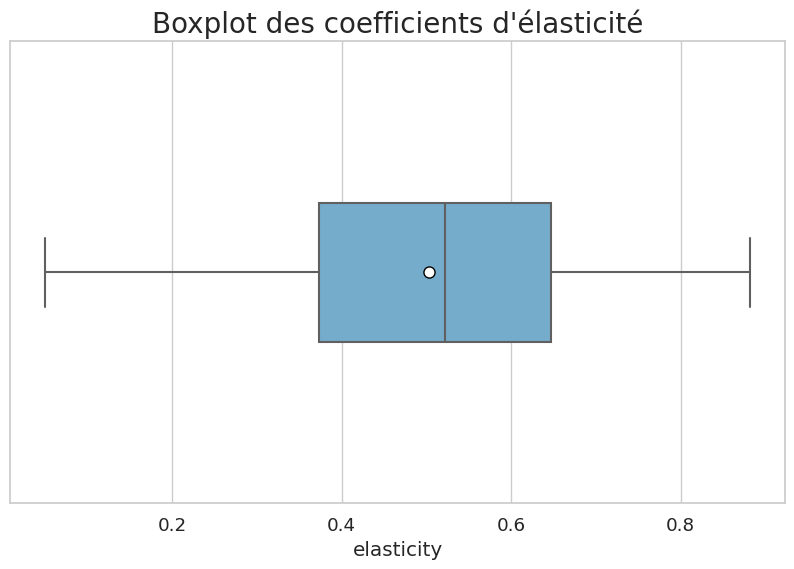

In [105]:
sns.set(font_scale=1.2, style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

_ = ax.set_title ('Boxplot des coefficients d\'élasticité', fontsize=20)

g = sns.boxplot(ax=ax, orient='h', data=elasticity, x='elasticity', palette='Blues', width=0.3,
                showmeans=True, showfliers=True, saturation=0.8, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})

plt.show();

### Fonctions de génération des matrices de probabilités (une matrice par pays)

In [106]:
def generate_incomes(n, pj):

    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le calcul de la classe de revenu)
    ln_y_parent = st.norm(0, 1).rvs(size=n, random_state=1)

    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0, 1).rvs(size=n, random_state=2)

    return np.exp(pj * ln_y_parent + residues), np.exp(ln_y_parent)

def quantiles(l, nb_quantiles):

    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) - 0.5 + 1./size)
    q_dict = {a:int(b) for a, b in zip(l_sorted, quantiles)}

    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):

    y_child = pd.Series(y_child) # revenu de l'enfant 
    y_parents = pd.Series(y_parents) # revenu des parents
    c_i_child = quantiles(y_child, nb_quantiles) # classe de revenu de l'enfant i
    c_i_parent = quantiles(y_parents, nb_quantiles) #  classe de revenu des parents de i
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ['y_child', 'y_parents', 'c_i_child', 'c_i_parent']

    return sample

def distribution(counts, nb_quantiles):

    distrib = []
    total = counts['counts'].sum()

    if total == 0 :

        return [0] * nb_quantiles

    for q_p in range(1, nb_quantiles+1):
        
        subset = counts[counts.c_i_parent == q_p]

        if len(subset):

            nb = subset['counts'].values[0]
            distrib = distrib + [nb / total]

        else:

            distrib = distrib + [0]

    return distrib

def conditional_distributions(sample, nb_quantiles):

    counts = sample.groupby(['c_i_child', 'c_i_parent']).apply(len)
    counts = counts.reset_index()
    counts.columns = ['c_i_child', 'c_i_parent', 'counts']
    mat = []

    for child_quantile in np.arange(nb_quantiles)+1:

        subset = counts[counts.c_i_child == child_quantile]
        mat = mat + [distribution(subset, nb_quantiles)]

    return np.array(mat)

def plot_conditional_distributions(p, cd, nb_quantiles):

    plt.figure(figsize=(12, 10))

    # La ligne suivante sert à afficher un graphique en 'stack bars', sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html

    cumul = np.array([0] * nb_quantiles)

    for i, child_quantile in enumerate(cd):

        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1))
        cumul = cumul + np.array(child_quantile)

    #plt.axis([.5, nb_quantiles * 1.3 ,0 ,1])
    plt.axis([.5, nb_quantiles*1.05, 0, 1])
    plt.title(f'elasticity = {p}') 
    plt.legend(title='quantile enfants', bbox_to_anchor =(1.1, 1), ncol = 1)
    plt.xlabel('quantile parents')
    plt.ylabel('probabilité du quantile enfant')
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

### Test de l'algorithme de génération des matrices de probabilités

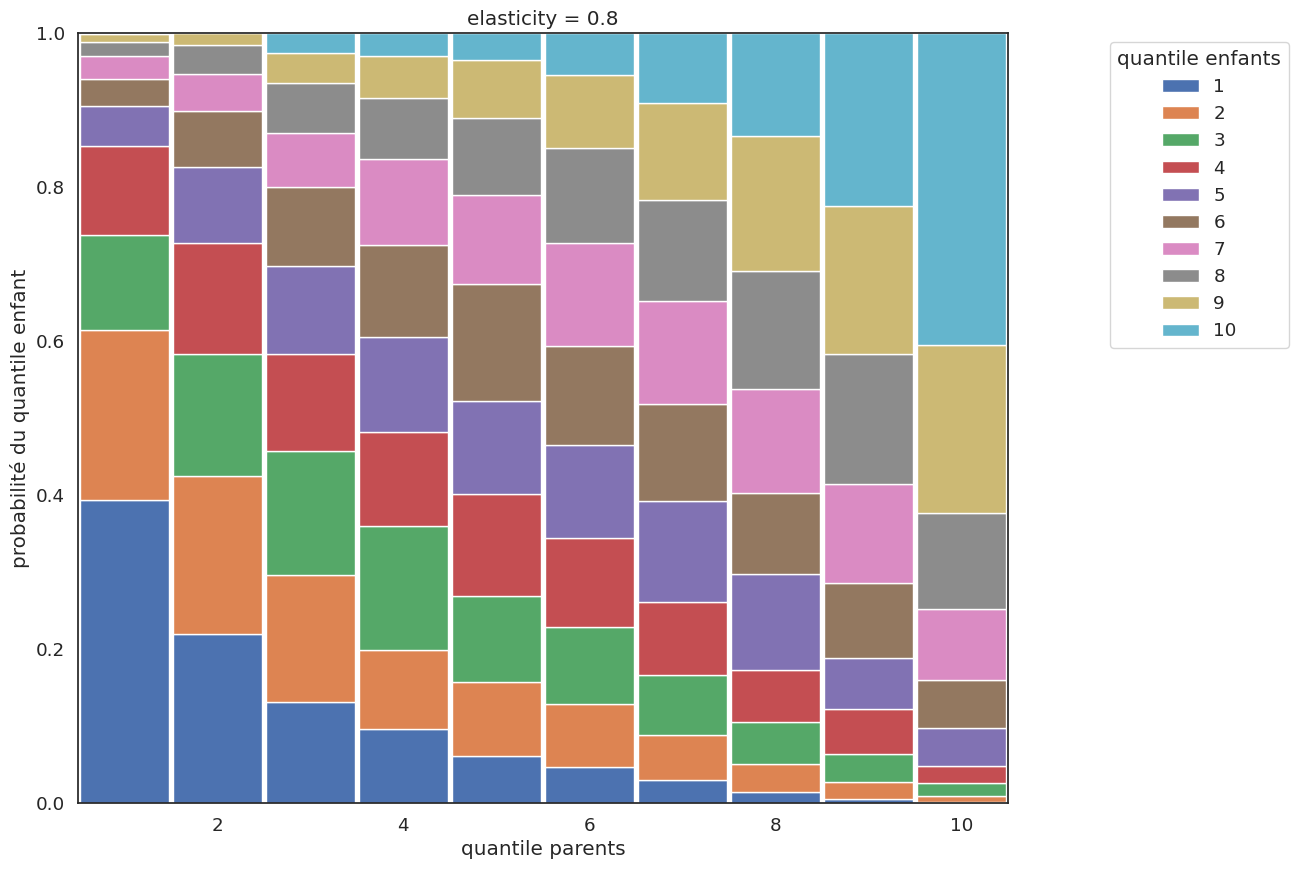

[[0.394 0.22  0.131 0.096 0.061 0.047 0.03  0.014 0.005 0.002]
 [0.22  0.205 0.166 0.103 0.097 0.082 0.059 0.037 0.023 0.008]
 [0.124 0.158 0.161 0.161 0.111 0.1   0.078 0.055 0.036 0.016]
 [0.115 0.145 0.126 0.122 0.133 0.116 0.095 0.067 0.059 0.022]
 [0.052 0.098 0.114 0.123 0.121 0.12  0.131 0.125 0.066 0.05 ]
 [0.036 0.073 0.102 0.12  0.151 0.129 0.125 0.105 0.097 0.062]
 [0.03  0.048 0.071 0.112 0.116 0.134 0.134 0.135 0.128 0.092]
 [0.017 0.038 0.064 0.079 0.1   0.123 0.132 0.153 0.169 0.125]
 [0.011 0.015 0.039 0.054 0.075 0.095 0.126 0.175 0.192 0.218]
 [0.001 0.    0.026 0.03  0.035 0.054 0.09  0.134 0.225 0.405]]


In [107]:
sns.set(font_scale=1.2, style='white')

# coefficient d'élasticité du pays j
pj = 0.8    

# nombre de quantiles (nombre de classes de revenu)
nb_quantiles = 10
# taille de l'échantillon
n  = 1000 * nb_quantiles

y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions(sample, nb_quantiles)  # matrice de distribution

plot_conditional_distributions(pj, cd, nb_quantiles)

print(cd)

In [108]:
# classe de revenu de l'enfant i
c_i_child = 1 
# classe de revenu des parents de i
c_i_parent = 1 

p = proba_cond(c_i_parent-1, c_i_child-1, cd)
print(f'\nP(c_i_parent = {c_i_parent} | c_i_child = {c_i_child}, pj = {pj}) = {p}')


P(c_i_parent = 1 | c_i_child = 1, pj = 0.8) = 0.394


In [109]:
# classe de revenu de l'enfant i
c_i_child = 1 
# classe de revenu des parents de i
c_i_parent = 10 

p = proba_cond(c_i_parent-1, c_i_child-1, cd)
print(f'\nP(c_i_parent = {c_i_parent} | c_i_child = {c_i_child}, pj = {pj}) = {p}')


P(c_i_parent = 10 | c_i_child = 1, pj = 0.8) = 0.002


In [110]:
# classe de revenu de l'enfant i
c_i_child = 10 
# classe de revenu des parents de i
c_i_parent = 10 

p = proba_cond(c_i_parent-1, c_i_child-1, cd)
print(f'\nP(c_i_parent = {c_i_parent} | c_i_child = {c_i_child}, pj = {pj}) = {p}')


P(c_i_parent = 10 | c_i_child = 10, pj = 0.8) = 0.405


### Génération des matrices de probabilité pour tous les pays et sauvegarde dans un dictionnaire (masqué)

In [111]:
# mat_list = []

# # coefficient d'élasticité du pays j
# pj_list = elasticity['elasticity'].to_list()
# # nombre de quantiles (nombre de classes de revenu)
# nb_quantiles = 100
# # taille de l'échantillon
# n  = 1000 * nb_quantiles

# for pj in pj_list:

#     y_child, y_parents = generate_incomes(n, pj)
#     sample = compute_quantiles(y_child, y_parents, nb_quantiles)
#     # matrice de probabilités
#     cd = conditional_distributions(sample, nb_quantiles)
#     mat_list.append(cd)

# country_list = elasticity['country'].to_list()
# prob_dict = {key:value for (key, value) in zip(country_list, mat_list)}
# prob_dict['ALB']

# # Save the dictionnary
# dump(prob_dict, 'prob_dict.joblib');

#### Merge : enrichissement du dataset de la World Income Distribution avec les données de population, l'indice de Gini, le coefficient d'élasticité

In [112]:
idd[:5]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [113]:
idd.shape

(11600, 6)

In [114]:
pop[:5]

,Area Code (ISO3),Population
0,AFG,27722276.0
1,ALB,3002678.0
2,DZA,34730608.0
3,ASM,57492.0
4,AND,83862.0


In [115]:
gini[:5]

,Country Name,Country Code,Gini index
0,Angola,AGO,49
1,Albania,ALB,32
2,United Arab Emirates,ARE,29
3,Argentina,ARG,45
4,Armenia,ARM,32


In [116]:
gini = gini.rename(columns={'Country Code': 'country'})

In [117]:
idd['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004])

In [118]:
idd['nb_quantiles'].unique()

array([100])

In [119]:
i0 = idd.loc[:, ['country', 'quantile', 'income']]
i0[:5]

,country,quantile,income
0,ALB,1,728.89795
1,ALB,2,916.66235
2,ALB,3,1010.91600
3,ALB,4,1086.90780
4,ALB,5,1132.69970


In [120]:
i0.shape

(11600, 3)

In [121]:
pop = pop.rename(columns={'Area Code (ISO3)': 'country'})
pop[:5]

,country,Population
0,AFG,27722276.0
1,ALB,3002678.0
2,DZA,34730608.0
3,ASM,57492.0
4,AND,83862.0


In [122]:
pop.shape

(248, 2)

In [123]:
gini.shape

(163, 3)

In [124]:
i1 = pd.merge(i0, pop, how='left', on='country')
i1

,country,quantile,income,Population
0,ALB,1,728.89795,3002678.0
1,ALB,2,916.66235,3002678.0
2,ALB,3,1010.91600,3002678.0
3,ALB,4,1086.90780,3002678.0
4,ALB,5,1132.69970,3002678.0
...,...,...,...,...
11595,ZAF,96,24553.56800,49779471.0
11596,ZAF,97,28858.03100,49779471.0
11597,ZAF,98,35750.29000,49779471.0
11598,ZAF,99,46297.31600,49779471.0


In [125]:
i2 = pd.merge(i1, gini, how='left', on='country')
i2[:5]

,country,quantile,income,Population,Country Name,Gini index
0,ALB,1,728.89795,3002678.0,Albania,32.0
1,ALB,2,916.66235,3002678.0,Albania,32.0
2,ALB,3,1010.91600,3002678.0,Albania,32.0
3,ALB,4,1086.90780,3002678.0,Albania,32.0
4,ALB,5,1132.69970,3002678.0,Albania,32.0


In [126]:
i3 = elasticity.loc[:, ['country', 'elasticity']].copy()
i3

,country,elasticity
0,AFG,0.336376
1,AGO,0.501068
2,ALB,0.668573
3,ARG,0.594954
4,ARM,0.321540
...,...,...
148,VUT,0.365555
149,XKX,0.547309
150,YEM,0.675573
151,ZAF,0.638598


In [127]:
i4 = pd.merge(i2, i3, how='left', on='country')
i4[:5]

,country,quantile,income,Population,Country Name,Gini index,elasticity
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573
1,ALB,2,916.66235,3002678.0,Albania,32.0,0.668573
2,ALB,3,1010.91600,3002678.0,Albania,32.0,0.668573
3,ALB,4,1086.90780,3002678.0,Albania,32.0,0.668573
4,ALB,5,1132.69970,3002678.0,Albania,32.0,0.668573


In [128]:
i4.shape

(11600, 7)

In [129]:
i4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 11599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   quantile      11600 non-null  int64  
 2   income        11600 non-null  float64
 3   Population    11400 non-null  float64
 4   Country Name  11400 non-null  object 
 5   Gini index    11400 non-null  float64
 6   elasticity    11400 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 725.0+ KB


In [130]:
# Valeurs manquantes
i4.isna().sum()

country           0
quantile          0
income            0
Population      200
Country Name    200
Gini index      200
elasticity      200
dtype: int64

In [131]:
i4['elasticity'].isna()
i4.loc[i4['elasticity'].isna(), 'country'].unique()

array(['LUX', 'SYR'], dtype=object)

In [132]:
i4['Gini index'].isna()
#i4.loc[i4['Gini index'].isna(), :]
i4.loc[i4['Gini index'].isna(), 'country'].unique()

array(['KHM', 'TWN'], dtype=object)

In [133]:
i4['Country Name'].isna()
#i4.loc[i4['Country Name'].isna(), :]
i4.loc[i4['Country Name'].isna(), 'country'].unique()

array(['KHM', 'TWN'], dtype=object)

In [134]:
i4['Population'].isna()
#i4.loc[i4['Population'].isna(), :]
i4.loc[i4['Population'].isna(), 'country'].unique()

array(['SDN', 'XKX'], dtype=object)

In [135]:
dl = ['LUX', 'SYR', 'KHM', 'TWN', 'XKX', 'SDN']
i4 = i4.drop(index=i4.loc[i4['country'].isin(dl), :].index)
i4.isna().sum()

country         0
quantile        0
income          0
Population      0
Country Name    0
Gini index      0
elasticity      0
dtype: int64

In [136]:
i4.shape

(11000, 7)

In [137]:
# Duplicate (most commonly rows of data that are exactly the same across all columns)
i4.duplicated().any()

False

In [138]:
i4.describe(include='all')

,country,quantile,income,Population,Country Name,Gini index,elasticity
count,11000,11000.000000,11000.000000,1.100000e+04,11000,11000.000000,11000.000000
unique,110,NaN,NaN,NaN,110,NaN,NaN
top,ALB,NaN,NaN,NaN,Albania,NaN,NaN
freq,100,NaN,NaN,NaN,100,NaN,NaN
mean,NaN,50.500000,5971.514392,5.611368e+07,NaN,37.900000,0.528716
std,NaN,28.867382,9216.044332,1.760070e+08,NaN,7.796566,0.165857
min,NaN,1.000000,16.719418,3.108560e+05,NaN,25.000000,0.108344
25%,NaN,25.750000,905.144153,4.771019e+06,NaN,32.000000,0.403847
50%,NaN,50.500000,2450.478250,1.386716e+07,NaN,36.000000,0.533524
75%,NaN,75.250000,7403.364075,4.185394e+07,NaN,43.000000,0.663425


In [139]:
i4[:5]

,country,quantile,income,Population,Country Name,Gini index,elasticity
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573
1,ALB,2,916.66235,3002678.0,Albania,32.0,0.668573
2,ALB,3,1010.91600,3002678.0,Albania,32.0,0.668573
3,ALB,4,1086.90780,3002678.0,Albania,32.0,0.668573
4,ALB,5,1132.69970,3002678.0,Albania,32.0,0.668573


In [140]:
i4_means = i4.groupby('country')[['income']].mean()
i4_means = i4_means.reset_index()
i4_means

,country,income
0,ALB,2994.829902
1,ARG,5847.884654
2,ARM,1628.382785
3,AUT,16637.600204
4,AZE,2357.429023
...,...,...
105,USA,25503.581661
106,VEN,3167.147724
107,VNM,1377.773966
108,YEM,1042.635870


In [141]:
i4 = i4.rename(columns={'income': 'income_ref'})
i4

,country,quantile,income_ref,Population,Country Name,Gini index,elasticity
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573
1,ALB,2,916.66235,3002678.0,Albania,32.0,0.668573
2,ALB,3,1010.91600,3002678.0,Albania,32.0,0.668573
3,ALB,4,1086.90780,3002678.0,Albania,32.0,0.668573
4,ALB,5,1132.69970,3002678.0,Albania,32.0,0.668573
...,...,...,...,...,...,...,...
11595,ZAF,96,24553.56800,49779471.0,South Africa,62.0,0.638598
11596,ZAF,97,28858.03100,49779471.0,South Africa,62.0,0.638598
11597,ZAF,98,35750.29000,49779471.0,South Africa,62.0,0.638598
11598,ZAF,99,46297.31600,49779471.0,South Africa,62.0,0.638598


In [142]:
i4 = pd.merge(i4, i4_means, how='left', on='country')
i4

,country,quantile,income_ref,Population,Country Name,Gini index,elasticity,income
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902
1,ALB,2,916.66235,3002678.0,Albania,32.0,0.668573,2994.829902
2,ALB,3,1010.91600,3002678.0,Albania,32.0,0.668573,2994.829902
3,ALB,4,1086.90780,3002678.0,Albania,32.0,0.668573,2994.829902
4,ALB,5,1132.69970,3002678.0,Albania,32.0,0.668573,2994.829902
...,...,...,...,...,...,...,...,...
10995,ZAF,96,24553.56800,49779471.0,South Africa,62.0,0.638598,5617.904880
10996,ZAF,97,28858.03100,49779471.0,South Africa,62.0,0.638598,5617.904880
10997,ZAF,98,35750.29000,49779471.0,South Africa,62.0,0.638598,5617.904880
10998,ZAF,99,46297.31600,49779471.0,South Africa,62.0,0.638598,5617.904880


In [143]:
i4_ref = i4.loc[:, ['country', 'quantile', 'income_ref']]
i4_ref = i4_ref.rename(columns={'quantile': 'quantile_parent'})
i4_ref

,country,quantile_parent,income_ref
0,ALB,1,728.89795
1,ALB,2,916.66235
2,ALB,3,1010.91600
3,ALB,4,1086.90780
4,ALB,5,1132.69970
...,...,...,...
10995,ZAF,96,24553.56800
10996,ZAF,97,28858.03100
10997,ZAF,98,35750.29000
10998,ZAF,99,46297.31600


In [144]:
i4 = i4.rename(columns={'income_ref': 'income_quant'})
i4

,country,quantile,income_quant,Population,Country Name,Gini index,elasticity,income
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902
1,ALB,2,916.66235,3002678.0,Albania,32.0,0.668573,2994.829902
2,ALB,3,1010.91600,3002678.0,Albania,32.0,0.668573,2994.829902
3,ALB,4,1086.90780,3002678.0,Albania,32.0,0.668573,2994.829902
4,ALB,5,1132.69970,3002678.0,Albania,32.0,0.668573,2994.829902
...,...,...,...,...,...,...,...,...
10995,ZAF,96,24553.56800,49779471.0,South Africa,62.0,0.638598,5617.904880
10996,ZAF,97,28858.03100,49779471.0,South Africa,62.0,0.638598,5617.904880
10997,ZAF,98,35750.29000,49779471.0,South Africa,62.0,0.638598,5617.904880
10998,ZAF,99,46297.31600,49779471.0,South Africa,62.0,0.638598,5617.904880


In [145]:
i4['id'] = 1
i4['quantile_parent'] = 0
i4[:5]

,country,quantile,income_quant,Population,Country Name,Gini index,elasticity,income,id,quantile_parent
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
1,ALB,2,916.66235,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
2,ALB,3,1010.91600,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
3,ALB,4,1086.90780,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
4,ALB,5,1132.69970,3002678.0,Albania,32.0,0.668573,2994.829902,1,0


In [146]:
i4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 10999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          11000 non-null  object 
 1   quantile         11000 non-null  int64  
 2   income_quant     11000 non-null  float64
 3   Population       11000 non-null  float64
 4   Country Name     11000 non-null  object 
 5   Gini index       11000 non-null  float64
 6   elasticity       11000 non-null  float64
 7   income           11000 non-null  float64
 8   id               11000 non-null  int64  
 9   quantile_parent  11000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 945.3+ KB


In [147]:
i4['country'].nunique()

110

In [148]:
i4[:5]

,country,quantile,income_quant,Population,Country Name,Gini index,elasticity,income,id,quantile_parent
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
1,ALB,2,916.66235,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
2,ALB,3,1010.91600,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
3,ALB,4,1086.90780,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
4,ALB,5,1132.69970,3002678.0,Albania,32.0,0.668573,2994.829902,1,0


In [149]:
nb_pays = i4['country'].nunique()
print(f'Nombre de pays représentés : {nb_pays}')

Nombre de pays représentés : 110


#### Pourcentage de la population mondiale couverte

In [150]:
pop_couv = i4.groupby('country')['Population'].unique().sum().item()
pop_couv

6172504917.0

In [151]:
print(f'Les données couvrent {int(np.round((pop_couv / 7003000000)*100))} % de la population mondiale')

Les données couvrent 88 % de la population mondiale


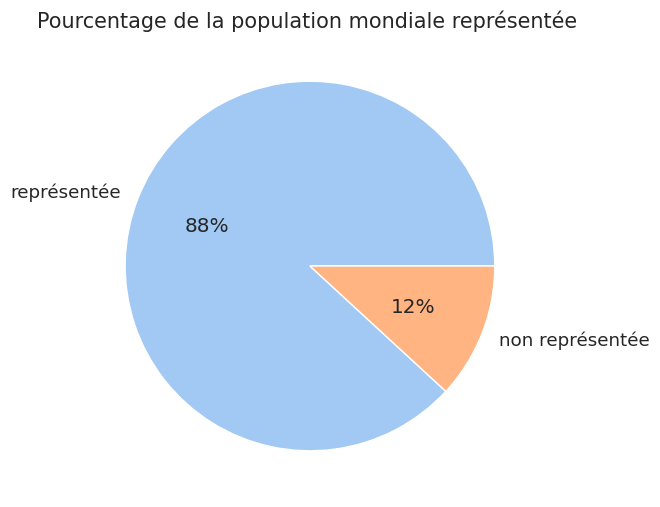

In [152]:
plt.figure(figsize=(8, 6))

#define data
data = [6172504917, (7003000000-6172504917)]
labels = ['représentée', 'non représentée']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Pourcentage de la population mondiale représentée ', fontsize=15)
plt.show()

### Clonage du dataset, on veut travailler sur un dataset de 500 individus

In [153]:
# Clonage : on veut un dataset de 500 individus
i5 = pd.concat([i4]*500, ignore_index=True)

In [154]:
i5.shape

(5500000, 10)

In [155]:
i4.shape[0]

11000

In [156]:
a = np.arange(1, 501)
b = np.repeat(a, 11000, axis=0)

In [157]:
i5['id'] = b

In [158]:
i5[-5:]

,country,quantile,income_quant,Population,Country Name,Gini index,elasticity,income,id,quantile_parent
5499995,ZAF,96,24553.568,49779471.0,South Africa,62.0,0.638598,5617.90488,500,0
5499996,ZAF,97,28858.031,49779471.0,South Africa,62.0,0.638598,5617.90488,500,0
5499997,ZAF,98,35750.290,49779471.0,South Africa,62.0,0.638598,5617.90488,500,0
5499998,ZAF,99,46297.316,49779471.0,South Africa,62.0,0.638598,5617.90488,500,0
5499999,ZAF,100,82408.550,49779471.0,South Africa,62.0,0.638598,5617.90488,500,0


In [159]:
i6 = i5.copy()
i6

,country,quantile,income_quant,Population,Country Name,Gini index,elasticity,income,id,quantile_parent
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
1,ALB,2,916.66235,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
2,ALB,3,1010.91600,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
3,ALB,4,1086.90780,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
4,ALB,5,1132.69970,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
...,...,...,...,...,...,...,...,...,...,...
5499995,ZAF,96,24553.56800,49779471.0,South Africa,62.0,0.638598,5617.904880,500,0
5499996,ZAF,97,28858.03100,49779471.0,South Africa,62.0,0.638598,5617.904880,500,0
5499997,ZAF,98,35750.29000,49779471.0,South Africa,62.0,0.638598,5617.904880,500,0
5499998,ZAF,99,46297.31600,49779471.0,South Africa,62.0,0.638598,5617.904880,500,0


In [160]:
wid = i6.copy()

In [161]:
wid = wid.sort_values(by=['country', 'quantile', 'id'])
wid = wid.reset_index(drop=True)
wid

,country,quantile,income_quant,Population,Country Name,Gini index,elasticity,income,id,quantile_parent
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,0
1,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,2,0
2,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,3,0
3,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,4,0
4,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,5,0
...,...,...,...,...,...,...,...,...,...,...
5499995,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,496,0
5499996,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,497,0
5499997,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,498,0
5499998,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,499,0


In [162]:
(wid['country'] == 'ALB').value_counts()

False    5450000
True       50000
Name: country, dtype: int64

#### Chargement du dictionnaire des matrices de probabilités

In [163]:
# Load the dictionnary
prob_dict = load('prob_dict.joblib')

In [164]:
len(prob_dict.keys())

153

In [165]:
prob_dict['ALB']

array([[0.173, 0.078, 0.069, ..., 0.   , 0.   , 0.   ],
       [0.098, 0.068, 0.052, ..., 0.   , 0.   , 0.   ],
       [0.057, 0.052, 0.047, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.041, 0.049, 0.066],
       [0.   , 0.   , 0.   , ..., 0.046, 0.078, 0.096],
       [0.   , 0.   , 0.   , ..., 0.063, 0.086, 0.157]])

In [166]:
print(prob_dict['ALB'].shape)
print(prob_dict['ALB'][:, :1].sum())
print(prob_dict['ALB'][:1, :].sum())

(100, 100)
1.0
1.0000000000000002


In [167]:
prob_dict['ALB'][0]

array([0.173, 0.078, 0.069, 0.043, 0.046, 0.034, 0.043, 0.026, 0.035,
       0.027, 0.027, 0.02 , 0.019, 0.015, 0.023, 0.021, 0.013, 0.013,
       0.015, 0.013, 0.009, 0.012, 0.015, 0.013, 0.018, 0.006, 0.016,
       0.007, 0.011, 0.008, 0.006, 0.006, 0.009, 0.005, 0.008, 0.003,
       0.005, 0.005, 0.004, 0.004, 0.006, 0.005, 0.003, 0.002, 0.006,
       0.005, 0.006, 0.002, 0.003, 0.003, 0.003, 0.003, 0.   , 0.001,
       0.002, 0.001, 0.001, 0.002, 0.002, 0.002, 0.   , 0.001, 0.003,
       0.002, 0.   , 0.002, 0.   , 0.001, 0.   , 0.002, 0.   , 0.001,
       0.   , 0.002, 0.   , 0.001, 0.001, 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [168]:
500 * prob_dict['ALB'][0]

array([86.5, 39. , 34.5, 21.5, 23. , 17. , 21.5, 13. , 17.5, 13.5, 13.5,
       10. ,  9.5,  7.5, 11.5, 10.5,  6.5,  6.5,  7.5,  6.5,  4.5,  6. ,
        7.5,  6.5,  9. ,  3. ,  8. ,  3.5,  5.5,  4. ,  3. ,  3. ,  4.5,
        2.5,  4. ,  1.5,  2.5,  2.5,  2. ,  2. ,  3. ,  2.5,  1.5,  1. ,
        3. ,  2.5,  3. ,  1. ,  1.5,  1.5,  1.5,  1.5,  0. ,  0.5,  1. ,
        0.5,  0.5,  1. ,  1. ,  1. ,  0. ,  0.5,  1.5,  1. ,  0. ,  1. ,
        0. ,  0.5,  0. ,  1. ,  0. ,  0.5,  0. ,  1. ,  0. ,  0.5,  0.5,
        0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ])

In [169]:
# # TEST

# test = prob_dict['ALB']
# res = []
# i=0
# my_list = []
# for count, value in enumerate(test[i]):
#     my_list.extend(np.full((int(np.ceil(value)), ), count))
# my_list = my_list[:500]
# res.extend(my_list)
# print(len(res))
# print(sum(res))
# print(np.unique(res))

### Répartition des classes de revenus des parents

In [170]:
result = []
ni = 500 # nombre de clones
liste_pays = wid['country'].unique()

for pays in liste_pays:
    prob_mat = ni * prob_dict[pays] 
    for i in range (100):
        my_list = []
        for count, value in enumerate(prob_mat[i], start=1):
            my_list.extend(np.full((int(np.ceil(value)), ), count))
        my_list = my_list[:ni]
        result.extend(my_list)

# print(len(result))
# print(sum(result))
# print(np.unique(result))

wid['quantile_parent'] = result
wid.to_csv('wid.csv', index=False)

### Autre méthode pour la répartition des classes de revenus des parents

In [171]:
# result = []
# ni = 500 # nombre de clones
# liste_pays = wid['country'].unique()
# mat_classes, _ = np.mgrid[1:101, 1:501]

# for pays in liste_pays:
#     prob_mat = ni * prob_dict[pays] 
#     for i in range (100):
#         my_list = []
#         for count, value in enumerate(prob_mat[i], start=0):
#             my_list.extend(mat_classes[count, :int(np.ceil(value))])
#         my_list = my_list[:ni]
#         result.extend(my_list)

# # print(len(result))
# # print(sum(result))
# # print(np.unique(result))

# <a name="M4">Mission 4</a>

In [172]:
i4_ref[:3]

,country,quantile_parent,income_ref
0,ALB,1,728.89795
1,ALB,2,916.66235
2,ALB,3,1010.91600


In [173]:
wid

,country,quantile,income_quant,Population,Country Name,Gini index,elasticity,income,id,quantile_parent
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,1
1,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,2,1
2,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,3,1
3,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,4,1
4,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,5,1
...,...,...,...,...,...,...,...,...,...,...
5499995,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,496,100
5499996,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,497,100
5499997,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,498,100
5499998,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,499,100


In [174]:
wid = pd.merge(wid, i4_ref, how='left', on=['country', 'quantile_parent'])
wid

,country,quantile,income_quant,Population,Country Name,Gini index,elasticity,income,id,quantile_parent,income_ref
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,1,728.89795
1,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,2,1,728.89795
2,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,3,1,728.89795
3,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,4,1,728.89795
4,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,5,1,728.89795
...,...,...,...,...,...,...,...,...,...,...,...
5499995,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,496,100,82408.55000
5499996,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,497,100,82408.55000
5499997,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,498,100,82408.55000
5499998,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,499,100,82408.55000


In [175]:
wid = wid.rename(columns={'income_ref': 'income_parent', 'Gini index': 'Gini_index'})
wid[:3]

,country,quantile,income_quant,Population,Country Name,Gini_index,elasticity,income,id,quantile_parent,income_parent
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,1,728.89795
1,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,2,1,728.89795
2,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,3,1,728.89795


In [176]:
i4_ref[:3]

,country,quantile_parent,income_ref
0,ALB,1,728.89795
1,ALB,2,916.66235
2,ALB,3,1010.91600


In [177]:
i4_ref = i4_ref.rename(columns={'quantile_parent': 'quantile', 'income_ref': 'income_enfant'})
i4_ref[:3]

,country,quantile,income_enfant
0,ALB,1,728.89795
1,ALB,2,916.66235
2,ALB,3,1010.91600


In [178]:
wid

,country,quantile,income_quant,Population,Country Name,Gini_index,elasticity,income,id,quantile_parent,income_parent
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,1,728.89795
1,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,2,1,728.89795
2,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,3,1,728.89795
3,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,4,1,728.89795
4,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,5,1,728.89795
...,...,...,...,...,...,...,...,...,...,...,...
5499995,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,496,100,82408.55000
5499996,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,497,100,82408.55000
5499997,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,498,100,82408.55000
5499998,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,499,100,82408.55000


In [179]:
wid = pd.merge(wid, i4_ref, how='left', on=['country', 'quantile'])
wid

,country,quantile,income_quant,Population,Country Name,Gini_index,elasticity,income,id,quantile_parent,income_parent,income_enfant
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,1,728.89795,728.89795
1,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,2,1,728.89795,728.89795
2,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,3,1,728.89795,728.89795
3,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,4,1,728.89795,728.89795
4,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,5,1,728.89795,728.89795
...,...,...,...,...,...,...,...,...,...,...,...,...
5499995,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,496,100,82408.55000,82408.55000
5499996,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,497,100,82408.55000,82408.55000
5499997,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,498,100,82408.55000,82408.55000
5499998,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,499,100,82408.55000,82408.55000


In [180]:
wid.describe(include='all')

,country,quantile,income_quant,Population,Country Name,Gini_index,elasticity,income,id,quantile_parent,income_parent,income_enfant
count,5500000,5.500000e+06,5.500000e+06,5.500000e+06,5500000,5.500000e+06,5.500000e+06,5.500000e+06,5.500000e+06,5.500000e+06,5.500000e+06,5.500000e+06
unique,110,NaN,NaN,NaN,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ALB,NaN,NaN,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,50000,NaN,NaN,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.050000e+01,5.971514e+03,5.611368e+07,NaN,3.790000e+01,5.287162e-01,5.971514e+03,2.505000e+02,4.827819e+01,5.362706e+03,5.971514e+03
std,NaN,2.886607e+01,9.215626e+03,1.759990e+08,NaN,7.796212e+00,1.658499e-01,6.421472e+03,1.443373e+02,2.771121e+01,7.502101e+03,9.215626e+03
min,NaN,1.000000e+00,1.671942e+01,3.108560e+05,NaN,2.500000e+01,1.083443e-01,2.760160e+02,1.000000e+00,1.000000e+00,1.671942e+01,1.671942e+01
25%,NaN,2.575000e+01,9.051442e+02,4.771019e+06,NaN,3.200000e+01,4.038472e-01,1.377774e+03,1.257500e+02,2.400000e+01,8.617350e+02,9.051442e+02
50%,NaN,5.050000e+01,2.450478e+03,1.386716e+07,NaN,3.600000e+01,5.335241e-01,3.307303e+03,2.505000e+02,4.800000e+01,2.274402e+03,2.450478e+03
75%,NaN,7.525000e+01,7.403364e+03,4.185394e+07,NaN,4.300000e+01,6.634245e-01,7.051610e+03,3.752500e+02,7.200000e+01,6.786425e+03,7.403364e+03


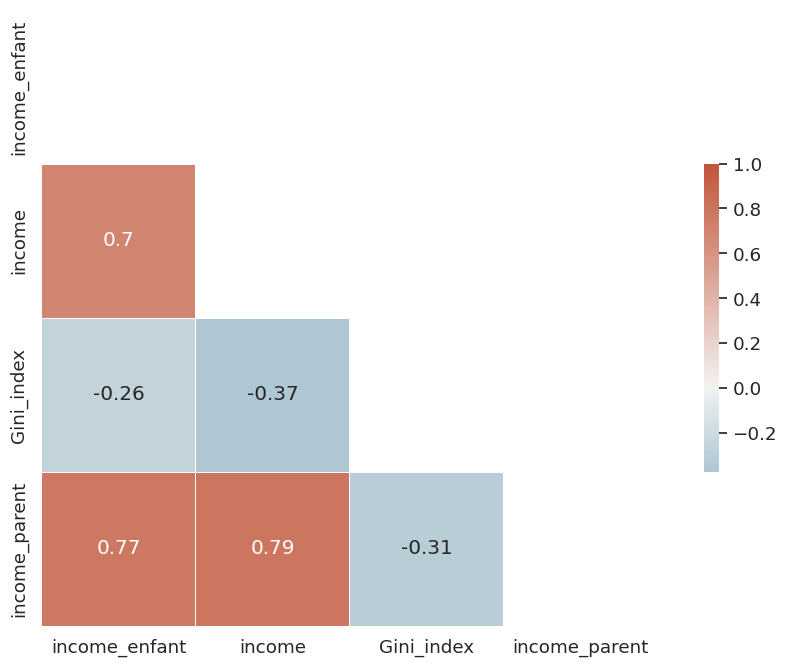

In [181]:
col_names = ['income_enfant', 'income', 'Gini_index', 'income_parent']

# Compute the correlation matrix
corr = wid[col_names].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True);

In [182]:
# Compute VIF data for each independent variable
# Typically VIF value > 5 indicates the presence of multicollinearity

vif = pd.DataFrame()
col_names = ['income_enfant', 'income', 'Gini_index', 'income_parent']
vif['features'] = col_names
vif['vif_factor'] = [variance_inflation_factor(wid[col_names].to_numpy(), i) for i in range(len(col_names))]
vif

,features,vif_factor
0,income_enfant,3.715910
1,income,4.886021
2,Gini_index,1.600228
3,income_parent,5.318267


In [183]:
# f, ax = plt.subplots(figsize=(10, 8))
# f.suptitle('Analyse bivariée : income_enfant vs income (ci 95 %)', fontsize=18);
# sns.regplot(x='income', y='income_enfant', data=wid, ax=ax)
# plt.savefig('Analyse bivariée 1.png', transparent=True)
# plt.show;

In [184]:
# f, ax = plt.subplots(figsize=(10, 8))
# ax.set(xscale='log', yscale='log')
# f.suptitle('Analyse bivariée : income_enfant vs income (ci 95 %)', fontsize=18);
# sns.regplot(x='income', y='income_enfant', data=wid, ax=ax)
# plt.savefig('Analyse bivariée 1 bis.png', transparent=True)
# plt.show;

In [185]:
# wid.plot(kind='scatter', x='income', y='income_enfant', color='tab:Blue', figsize=(10, 8))
# plt.show();

In [186]:
# wid.plot(kind='scatter', x='income', y='income_enfant', color='tab:Blue', figsize=(10, 8))
# plt.xscale('log')
# plt.yscale('log')
# plt.show();

<img src='Analyse bivariée 1.png' width=750px>

In [187]:
print('Echelle logarithmique')

Echelle logarithmique


<img src='Analyse bivariée 2.png' width=750px>

In [188]:
np.log(1)

0.0

In [189]:
# sns.displot(data=wid, x='income_enfant', log_scale=False, height=5, aspect=1, kind='kde')
# plt.ylabel('Fréquence relative')
# plt.xlabel('income_enfant')
# plt.title('Distribution des revenus', fontsize=15)
# plt.show();

In [190]:
# sns.displot(data=wid, x='income_enfant', log_scale=True, height=5, aspect=1, kind='kde')
# plt.ylabel('Fréquence relative')
# plt.xlabel('income_enfant')
# plt.title('Distribution des revenus', fontsize=15)
# plt.show();

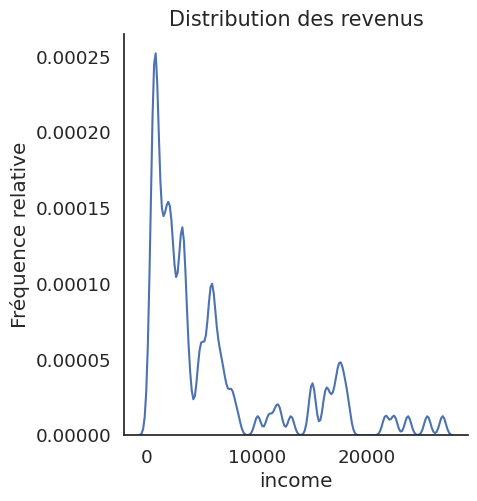

In [191]:
sns.displot(data=wid, x='income', log_scale=False, height=5, aspect=1, kind='kde')
plt.ylabel('Fréquence relative')
plt.xlabel('income')
plt.title('Distribution des revenus', fontsize=15)
plt.show();

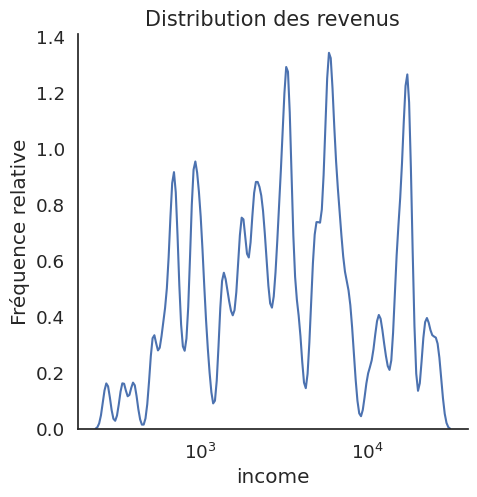

In [192]:
sns.displot(data=wid, x='income', log_scale=True, height=5, aspect=1, kind='kde')
plt.ylabel('Fréquence relative')
plt.xlabel('income')
plt.title('Distribution des revenus', fontsize=15)
plt.show();

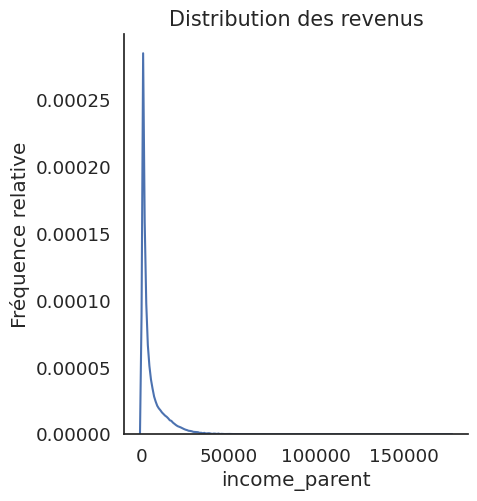

In [193]:
sns.displot(data=wid, x='income_parent', log_scale=False, height=5, aspect=1, kind='kde')
plt.ylabel('Fréquence relative')
plt.xlabel('income_parent')
plt.title('Distribution des revenus', fontsize=15)
plt.show();

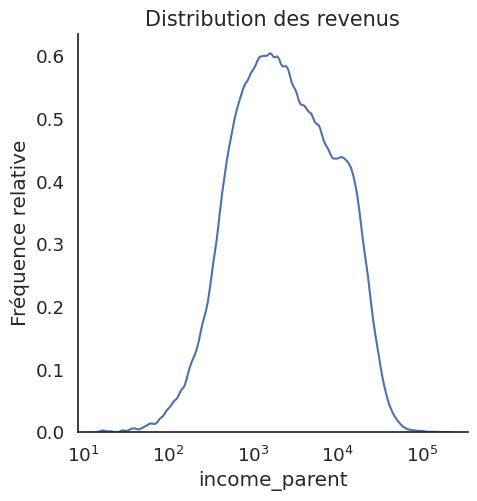

In [194]:
sns.displot(data=wid, x='income_parent', log_scale=True, height=5, aspect=1, kind='kde')
plt.ylabel('Fréquence relative')
plt.xlabel('income_parent')
plt.title('Distribution des revenus', fontsize=15)
plt.show();

### Anova

In [195]:
anova_wid = wid.loc[(wid['id']==1), ['country', 'income']]
anova_wid

,country,income
0,ALB,2994.829902
500,ALB,2994.829902
1000,ALB,2994.829902
1500,ALB,2994.829902
2000,ALB,2994.829902
...,...,...
5497500,ZAF,5617.904880
5498000,ZAF,5617.904880
5498500,ZAF,5617.904880
5499000,ZAF,5617.904880


In [196]:
anova_pays = smf.ols('income~country', data=anova_wid).fit()

In [197]:
# R-squared (coefficient of determination), it is the proportion of the variance in the dependent variable that is predictable/explained.
print(f'R2 : {np.round(anova_pays.rsquared, 4)}')

R2 : 1.0


In [198]:
print('Tableau d\'analyse de la variance')
sm.stats.anova_lm(anova_pays, typ=2)

Tableau d'analyse de la variance


,sum_sq,df,F,PR(>F)
country,4.535882e+11,109.0,7.854499e+29,0.0
Residual,5.769586e-17,10890.0,NaN,NaN


<img src='anova.png' width=750px>
<img src='Tableau anova.png' width=750px>

### Régressions linéaires

In [199]:
wid[:3]

,country,quantile,income_quant,Population,Country Name,Gini_index,elasticity,income,id,quantile_parent,income_parent,income_enfant
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,1,728.89795,728.89795
1,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,2,1,728.89795,728.89795
2,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,3,1,728.89795,728.89795


In [200]:
reg_1 = smf.ols('income_enfant ~ income + Gini_index', data=wid).fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:          income_enfant   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                 2.595e+06
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:52:36   Log-Likelihood:            -5.6184e+07
No. Observations:             5500000   AIC:                         1.124e+08
Df Residuals:                 5499997   BIC:                         1.124e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.523e-09     16.284   1.55e-10      1.0

In [201]:
reg_1_log = smf.ols('np.log(income_enfant) ~ np.log(income) + Gini_index', data=wid).fit()
print(reg_1_log.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log(income_enfant)   R-squared:                       0.719
Model:                               OLS   Adj. R-squared:                  0.719
Method:                    Least Squares   F-statistic:                 7.034e+06
Date:                   Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                           10:52:38   Log-Likelihood:            -6.0625e+06
No. Observations:                5500000   AIC:                         1.212e+07
Df Residuals:                    5499997   BIC:                         1.213e+07
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     

In [202]:
reg_2 = smf.ols('income_enfant ~ income + Gini_index + income_parent', data=wid).fit()
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:          income_enfant   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                 2.966e+06
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:52:40   Log-Likelihood:            -5.5365e+07
No. Observations:             5500000   AIC:                         1.107e+08
Df Residuals:                 5499996   BIC:                         1.107e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -589.7675     14.038    -42.011

In [203]:
reg_2_log = smf.ols('np.log(income_enfant) ~ np.log(income) + Gini_index + np.log(income_parent)', data=wid).fit()
print(reg_2_log.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log(income_enfant)   R-squared:                       0.783
Model:                               OLS   Adj. R-squared:                  0.783
Method:                    Least Squares   F-statistic:                 6.604e+06
Date:                   Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                           10:52:43   Log-Likelihood:            -5.3547e+06
No. Observations:                5500000   AIC:                         1.071e+07
Df Residuals:                    5499996   BIC:                         1.071e+07
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [204]:
print(f'Le modèle permet d\'expliquer {int(reg_2_log.rsquared*100)} % du revenu des individus.')

Le modèle permet d'expliquer 78 % du revenu des individus.


In [205]:
print('Tableau d\'analyse de la variance')
tab_anova = sm.stats.anova_lm(reg_2_log, typ=2)
tab_anova

Tableau d'analyse de la variance


,sum_sq,df,F,PR(>F)
np.log(income),3.950259e+05,1.0,9.626077e+05,0.0
Gini_index,1.616802e+04,1.0,3.939858e+04,0.0
np.log(income_parent),6.624626e+05,1.0,1.614303e+06,0.0
Residual,2.257037e+06,5499996.0,NaN,NaN


In [206]:
sct = tab_anova['sum_sq'].sum()
sct

3330693.1318385215

In [207]:
sce_pays = tab_anova.loc['np.log(income)':'Gini_index', 'sum_sq'].sum()
sce_pays

411193.92055959237

In [208]:
sce_income = tab_anova.loc['np.log(income)', 'sum_sq'].sum()
sce_income

395025.90188518655

In [209]:
sce_gini = tab_anova.loc['Gini_index', 'sum_sq'].sum()
sce_gini

16168.018674405816

In [210]:
sce_parents = tab_anova.loc['np.log(income_parent)', 'sum_sq']
sce_parents

662462.6470090521

In [211]:
sce_autres = tab_anova.loc['Residual', 'sum_sq']
sce_autres

2257036.564269877

In [212]:
print(f'L’indice de Gini explique {np.round((sce_gini/sct)*100, 2)} % de la classe de revenu des individus.\n')
print(f'La classe de revenu des parents explique {np.round((sce_parents/sct)*100, 2)} % de la classe de revenu des individus.\n')
print(f'Le revenu moyen du pays explique {np.round((sce_income/sct)*100, 2)} % de la classe de revenu des individus.\n')
print(f'Les facteurs non considérés dans le modèle expliquent {np.round((sce_autres/sct)*100, 2)} % de la classe de revenu des individus.')

L’indice de Gini explique 0.49 % de la classe de revenu des individus.

La classe de revenu des parents explique 19.89 % de la classe de revenu des individus.

Le revenu moyen du pays explique 11.86 % de la classe de revenu des individus.

Les facteurs non considérés dans le modèle expliquent 67.76 % de la classe de revenu des individus.


In [213]:
wid

,country,quantile,income_quant,Population,Country Name,Gini_index,elasticity,income,id,quantile_parent,income_parent,income_enfant
0,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,1,1,728.89795,728.89795
1,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,2,1,728.89795,728.89795
2,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,3,1,728.89795,728.89795
3,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,4,1,728.89795,728.89795
4,ALB,1,728.89795,3002678.0,Albania,32.0,0.668573,2994.829902,5,1,728.89795,728.89795
...,...,...,...,...,...,...,...,...,...,...,...,...
5499995,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,496,100,82408.55000,82408.55000
5499996,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,497,100,82408.55000,82408.55000
5499997,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,498,100,82408.55000,82408.55000
5499998,ZAF,100,82408.55000,49779471.0,South Africa,62.0,0.638598,5617.904880,499,100,82408.55000,82408.55000


### Avec sklearn (LinearRegression)

In [214]:
wid_selected = wid.loc[:, ['income_enfant', 'income', 'Gini_index', 'income_parent']]
wid_selected

,income_enfant,income,Gini_index,income_parent
0,728.89795,2994.829902,32.0,728.89795
1,728.89795,2994.829902,32.0,728.89795
2,728.89795,2994.829902,32.0,728.89795
3,728.89795,2994.829902,32.0,728.89795
4,728.89795,2994.829902,32.0,728.89795
...,...,...,...,...
5499995,82408.55000,5617.904880,62.0,82408.55000
5499996,82408.55000,5617.904880,62.0,82408.55000
5499997,82408.55000,5617.904880,62.0,82408.55000
5499998,82408.55000,5617.904880,62.0,82408.55000


In [215]:
wid_selected.loc[:, ['income_enfant', 'income', 'income_parent']] = wid_selected.loc[:, ['income_enfant', 'income', 'income_parent']].apply(np.log, axis=0)
wid_selected

,income_enfant,income,Gini_index,income_parent
0,6.591534,8.004643,32.0,6.591534
1,6.591534,8.004643,32.0,6.591534
2,6.591534,8.004643,32.0,6.591534
3,6.591534,8.004643,32.0,6.591534
4,6.591534,8.004643,32.0,6.591534
...,...,...,...,...
5499995,11.319444,8.633714,62.0,11.319444
5499996,11.319444,8.633714,62.0,11.319444
5499997,11.319444,8.633714,62.0,11.319444
5499998,11.319444,8.633714,62.0,11.319444


In [216]:
# On récupère les features
X = wid_selected.drop(columns='income_enfant')

# On récupère la variable à expliquer
y = wid_selected['income_enfant']

In [217]:
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X, y)
print(f'R2 : {np.round(lin_reg.score(X, y), 4)}')

R2 : 0.7827


In [218]:
# Make predictions
y_pred = lin_reg.predict(X)

In [219]:
# Actual - prediction = residuals
residuals = y - y_pred
residuals.describe()

count    5.500000e+06
mean     7.848774e-15
std      6.406016e-01
min     -6.583813e+00
25%     -3.738083e-01
50%     -1.148596e-02
75%      3.640083e-01
max      4.880492e+00
Name: income_enfant, dtype: float64

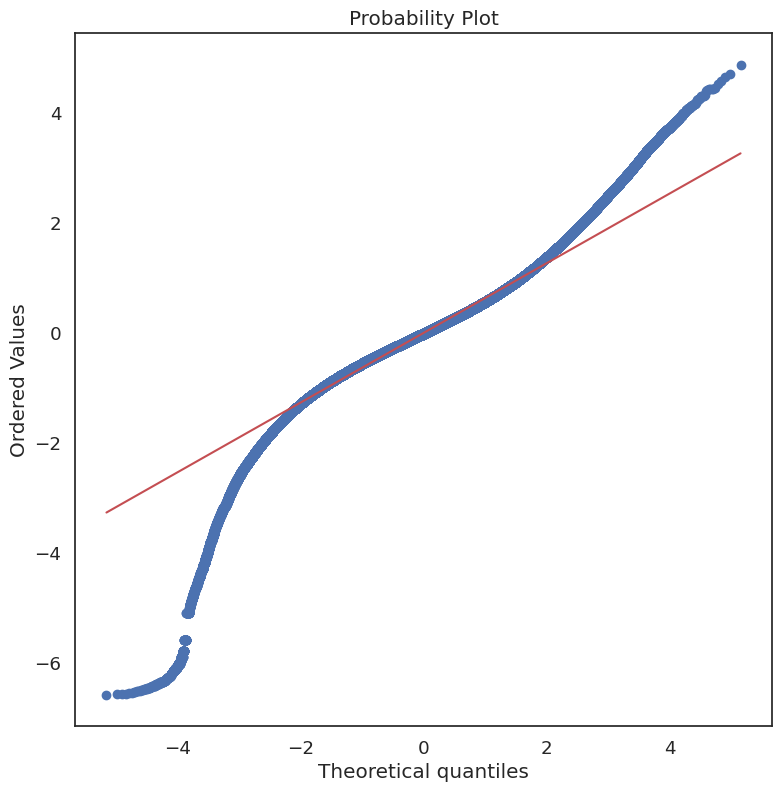

In [220]:
plt.figure(figsize=(9, 9))
st.probplot(residuals, dist='norm', plot=plt);

### Avec sklearn (LinearSVR)

In [221]:
# from sklearn.svm import LinearSVR

### Initialisation du modèle

In [222]:
# svm = LinearSVR(max_iter=1000)

### Entraînement du modèle

In [223]:
# svm.fit(X, y)

### Score du modèle

In [224]:
# print(f'R2 : {np.round(svm.score(X, y), 4)}')

## Conclusion

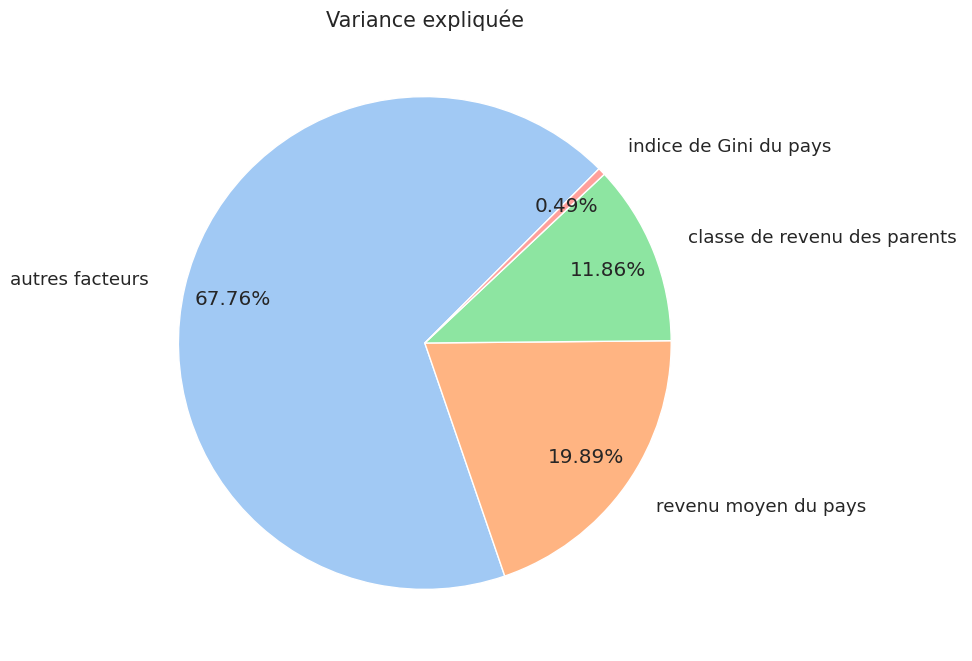

In [225]:
plt.figure(figsize=(10, 8))

#define data
data = [np.round((sce_autres/sct)*100, 2), np.round((sce_parents/sct)*100, 2), np.round((sce_income/sct)*100, 2), np.round((sce_gini/sct)*100, 2)]
labels = ['autres facteurs', 'revenu moyen du pays ', 'classe de revenu des parents ', 'indice de Gini du pays']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%1.2f%%', startangle=45, labeldistance=1.15, pctdistance=0.80)
plt.title('Variance expliquée', fontsize=15)
plt.savefig('Synthèse.png', transparent=True)
plt.show()